# **Global Coral Reef Bleaching Data Viz**
# **Author:** Universal Data Bytes 
# **Data Goal:** What are the top countries that exhibit the most coral bleaching events?

In this project, we will analyze and visualize coral bleaching events around the world. To make sure that the information collected stays as accurate and latest as possible, we will use 3 datasets cited below:

1) ReefBase (WorldFish) (2016) **Coral Bleaching Data.** ReefBase (WorldFish). Distribution Date 2003-12-31. doi:10.7910/DVN/KUVQKY [Oct 7 2024].
2) Sully, S., Burkepile, D. E., Donovan, M. K., Hodgson, G., & Van Woesik, R. **(2019) Global Ecology Coral Reef Dataset.** U.S. EPA Office of Research and Development (ORD). Data Last Modified 2019-03-17. doi:10.23719/1523099 [Oct 7 2024].
3) van Woesik, R., Burkepile, D. (2022) **Bleaching and environmental data for global coral reef sites from 1980-2020.** Biological and Chemical Oceanography Data Management Office (BCO-DMO). (Version 2) Version Date 2022-10-14. doi:10.26008/1912/bco-dmo.773466.2 [Oct 7 2024]

**Note:** For this project, we care about the places that have medium-high bleaching but we can also aggregate by how many bleaching events are in each country. We also want samples that are 100% sure that bleaching occurs, so disregard entries with "no bleaching" or "severity unknown."

## Importing dependencies and dataframes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
RB_df=pd.read_csv("Reefbase_bleaching_data.csv")
USEPA_df=pd.read_csv("USEnvProt_coralreef.csv")
RVW_df=pd.read_csv("RVW_global_bleaching.csv")

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_38335/1667157759.py:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  RVW_df=pd.read_csv("RVW_global_bleaching.csv")


### To make it easier, we will analyze each dataset one by one

## Reef Base's Coral Bleaching Data

In [3]:
RB_df.head(5)

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,MONTH,YEAR,DEPTH,...,RECOVERY_CODE,RECOVERY,SURVEY_TYPE,SURVEY_AREA,WATER_TEMPERATURE,OTHER_FACTORS,REMARKS,SOURCE,REFERENCE_CODE,COUNTRY_CODE
0,7067,NaN,NaN,France,"Hermitage, Reunion",-21.22,55.22,4.0,2008,6,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
1,7068,NaN,NaN,France,"Saint Gilles, Reunion",-21.05,55.23,7.0,2008,6.5,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
2,7069,NaN,NaN,France,"Saint-Leu, Reunion",-21.16,55.28,2.0,2008,6,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert . Site...",NaN,FRA
3,4024,NaN,NaN,France,SE France,43.00,5.00,8.0,1999,NaN,...,NaN,NaN,Diving,100 km,22-23.9 °C,NaN,Bleaching of Cladocora caespitosa and Oculina ...,Martin Pêcheux (martin-pecheux@wanadoo.fr) per...,NaN,FRA
4,7049,NaN,NaN,Macau,"Koh Tao, Surat Thani",10.12,99.81,7.0,2009,4,...,NaN,NaN,Reef Check Protocol,NaN,"Air temp 28 Deg C, Water temp 29 Deg C",NaN,0% of recorded recently killed coral on substr...,Reef check submitted by Suchana Apple Chavanic...,NaN,MAC


In [4]:
RB_df.shape

(6190, 28)

In [5]:
RB_df.isnull().sum()

ID                        0
REGION                   27
SUBREGION                27
COUNTRY                   0
LOCATION                123
LAT                       0
LON                       0
MONTH                  1309
YEAR                      0
DEPTH                  3149
SEVERITY_CODE             0
BLEACHING_SEVERITY        0
CORAL_FAMILY           5892
CORAL_SPECIES          5370
PERCENTAGE_AFFECTED    4577
BLEACHING_DURATION     5927
MORTALITY_CODE         5681
MORTALITY              5711
RECOVERY_CODE          6099
RECOVERY               6069
SURVEY_TYPE            3939
SURVEY_AREA            5213
WATER_TEMPERATURE      5124
OTHER_FACTORS          6102
REMARKS                3103
SOURCE                    0
REFERENCE_CODE         4721
COUNTRY_CODE              0
dtype: int64

In [6]:
# We only want the countries that have bleaching (bleaching_severity column)
# It is categorized by Low, Medium, HIGH, Severity Unknown, and No Bleaching

RB_df=RB_df[(RB_df["BLEACHING_SEVERITY"] != "Severity Unknown") & (RB_df["BLEACHING_SEVERITY"] != "No Bleaching")]
RB_df=RB_df[["COUNTRY", "BLEACHING_SEVERITY"]]
RB_df.head(5)

,COUNTRY,BLEACHING_SEVERITY
6,Mexico (Pacific),HIGH
7,Panama (Atlantic),Medium
8,St. Croix,Medium
9,St. Croix,Low
10,St. Croix,Low


Now we want to visualize 3 things:
1) All bleaching event counts of countries
2) Medium bleaching event counts of countries
3) High bleaching event counts of countries

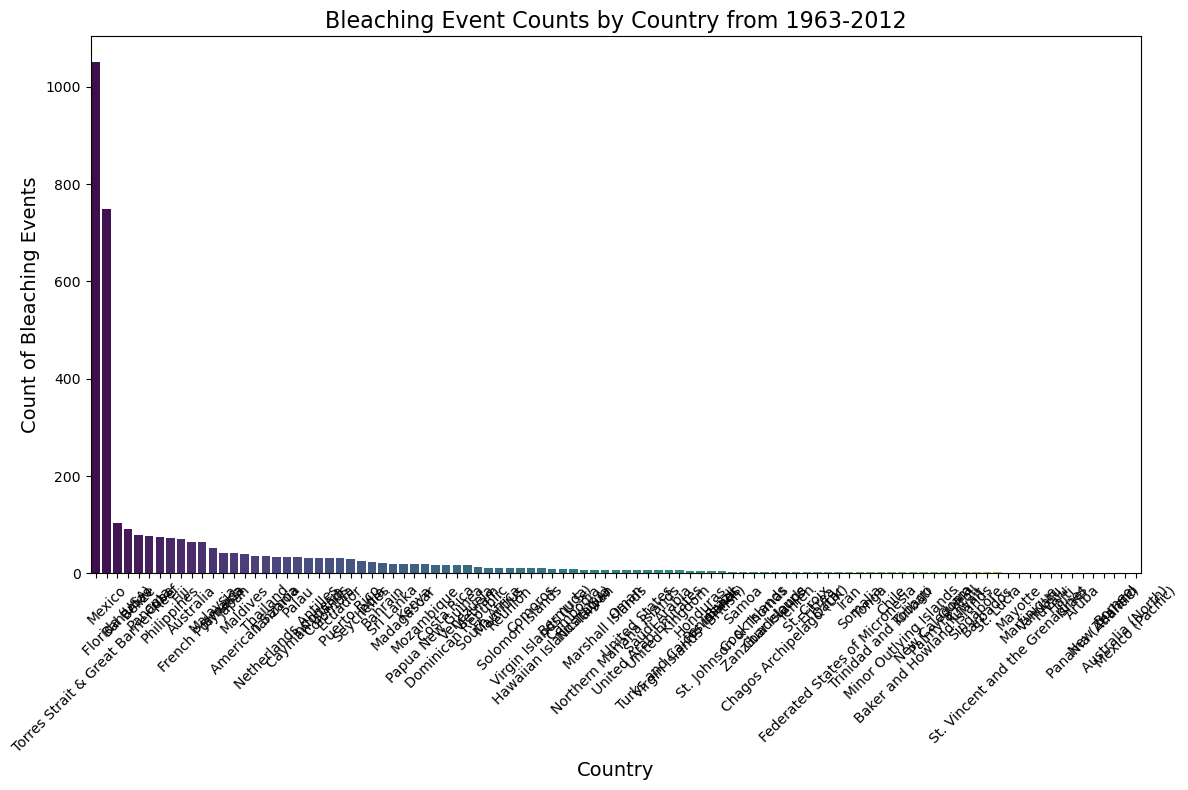

In [7]:
# 1. All bleaching event counts of countries

all_counts=RB_df["COUNTRY"].value_counts()
all_counts_df=all_counts.reset_index()
all_counts_df.columns=["COUNTRY", "BLEACHING_EVENT_COUNT"]

plt.figure(figsize=(12, 8))
sns.barplot(data=all_counts_df, x="COUNTRY", y="BLEACHING_EVENT_COUNT", palette="viridis")
plt.title("Bleaching Event Counts by Country from 1963-2012", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

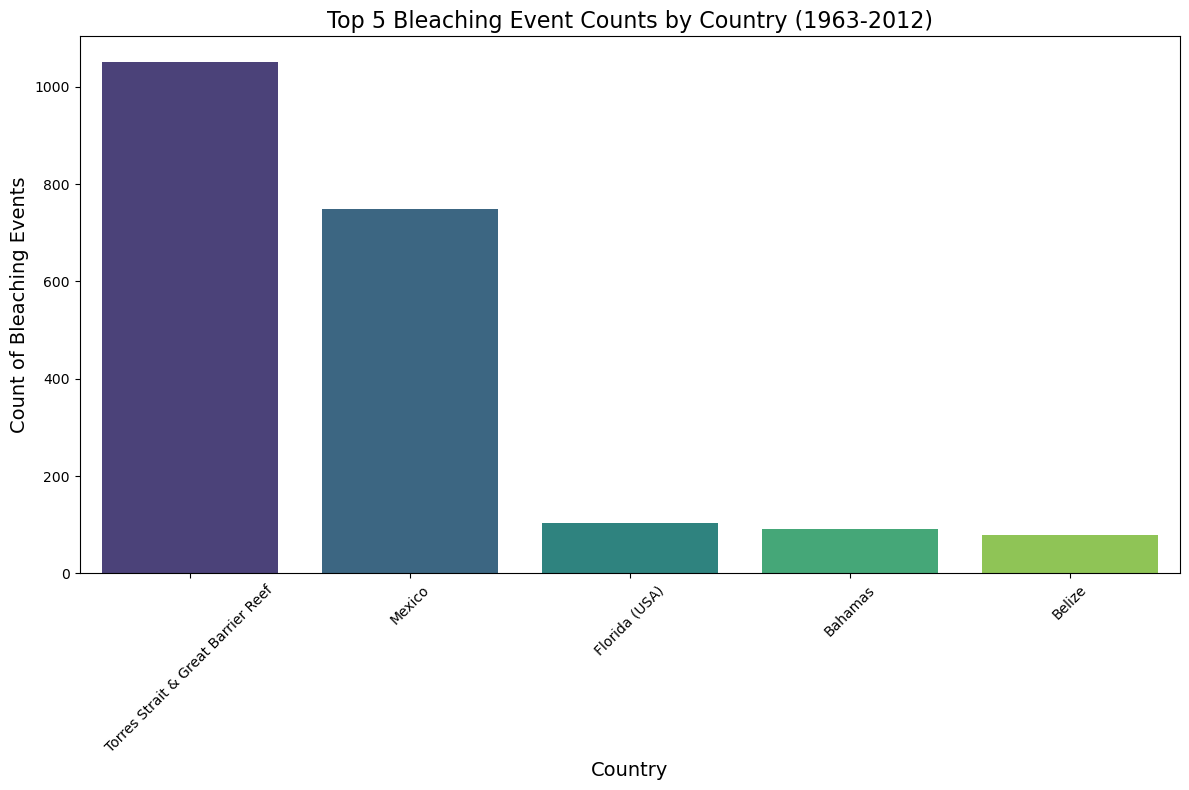

In [8]:
# Only get the top 5

top_5_counts_df=all_counts_df.nlargest(5, "BLEACHING_EVENT_COUNT")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_counts_df, x="COUNTRY", y="BLEACHING_EVENT_COUNT", palette="viridis")
plt.title("Top 5 Bleaching Event Counts by Country (1963-2012)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

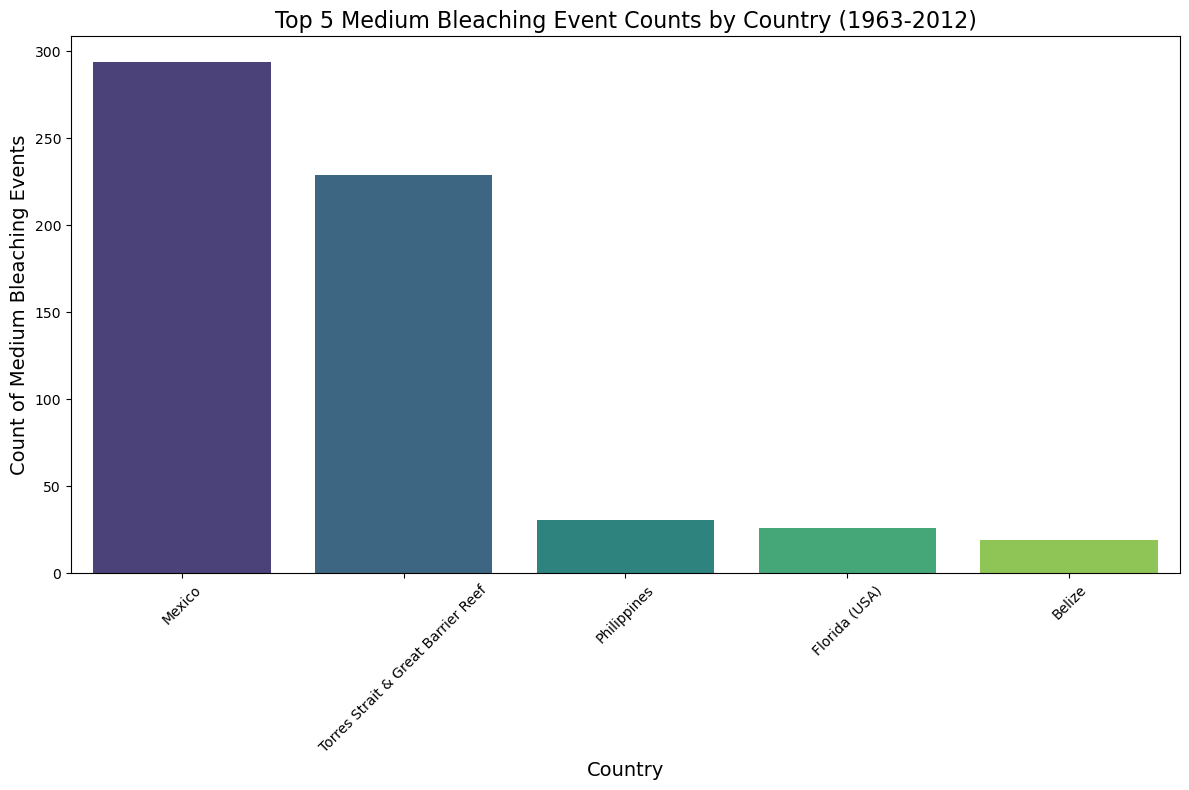

In [9]:
# Top 5 of medium bleaching event counts

medium_bleaching_df=RB_df[RB_df["BLEACHING_SEVERITY"]=="Medium"]
medium_counts=medium_bleaching_df["COUNTRY"].value_counts()
medium_counts_df=medium_counts.reset_index()
medium_counts_df.columns=["COUNTRY", "MEDIUM_BLEACHING_EVENT_COUNT"]

top_5_medium_counts_df=medium_counts_df.nlargest(5, "MEDIUM_BLEACHING_EVENT_COUNT")
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_medium_counts_df, x="COUNTRY", y="MEDIUM_BLEACHING_EVENT_COUNT", palette="viridis")
plt.title("Top 5 Medium Bleaching Event Counts by Country (1963-2012)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Medium Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


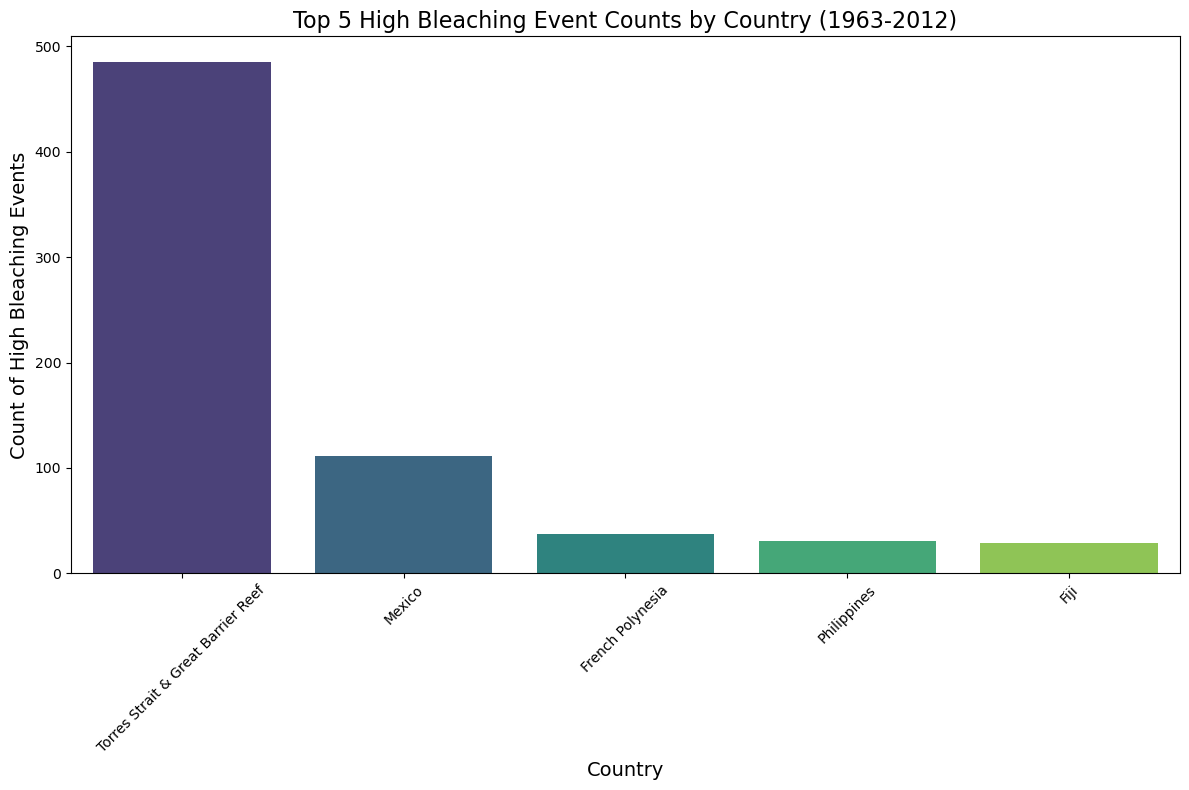

In [10]:
# Top 5 of HIGH bleaching event counts

high_bleaching_df=RB_df[RB_df["BLEACHING_SEVERITY"]=="HIGH"]
high_counts=high_bleaching_df["COUNTRY"].value_counts()
high_counts_df=high_counts.reset_index()
high_counts_df.columns=["COUNTRY", "HIGH_BLEACHING_EVENT_COUNT"]

top_5_high_counts_df=high_counts_df.nlargest(5, "HIGH_BLEACHING_EVENT_COUNT")
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_high_counts_df, x="COUNTRY", y="HIGH_BLEACHING_EVENT_COUNT", palette="viridis")
plt.title("Top 5 High Bleaching Event Counts by Country (1963-2012)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of High Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## US Environmental Protection Agency (EPA) Coral Dataset

In [11]:
USEPA_df.head(5)

,Reef.ID,Reef.Name,Ocean,Country,State.Province.Island,City.Town,Year,Date,Depth,Organism.Code,...,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Region,Diversity,rate_of_SST_change,Longitude.Degrees,Latitude.Degrees
0,103.10.28.1E.10.50.46.1N,Koh Mano (Minor),Indian,Cambodia,Koh Kong,NaN,2003,19-Feb-03,4.5,Bleaching (% of population),...,1.0,0.0,1.690,14.560,0.590,ERG050,417.0,0.020556,103.174472,10.846139
1,103.11.35.5E.10.49.32N,Koh Mano (south),Indian,Cambodia,Koh Kong,NaN,2003,28-Feb-03,4.5,Bleaching (% of population),...,1.0,0.0,1.800,17.010,0.520,ERG050,417.0,0.020556,103.193194,10.825556
2,103.11.79.5E.10.48.2.7N,Koh Ta Team,Indian,Cambodia,Koh Kong,NaN,2003,24-Feb-03,5.0,Bleaching (% of population),...,1.0,0.0,1.620,13.760,0.520,ERG050,417.0,0.020556,103.196583,10.800750
3,103.4.16.8E.11.3.36.2N,Koh Krosa Krao,Indian,Cambodia,Koh Kong,NaN,2003,25-Feb-03,6.0,Bleaching (% of population),...,1.0,0.0,1.450,10.940,0.410,ERG050,417.0,0.019066,103.071333,11.060056
4,103.4.63.9E.11.3.58.3N,Koh Krosa Kandal,Indian,Cambodia,Koh Kong,NaN,2003,27-Feb-03,3.2,Bleaching (% of population),...,1.0,0.0,1.692,15.038,0.488,ERG050,417.0,0.019066,103.077306,11.066194


In [12]:
USEPA_df.shape

(9215, 55)

In [13]:
USEPA_df.isnull().sum()

Reef.ID                                     0
Reef.Name                                   0
Ocean                                      21
Country                                     0
State.Province.Island                     983
City.Town                                2253
Year                                        0
Date                                        0
Depth                                       0
Organism.Code                               0
S1                                          9
S2                                         12
S3                                         70
S4                                        107
Errors.                                     0
What.errors.                             7274
Average_bleaching                           0
ClimSST                                     1
Temperature_Kelvin                          5
Temperature_Mean                            5
Temperature_Minimum                         5
Temperature_Maximum               

In [14]:
# Data preprocessing
# We want the entries with False errors
# And then only want the entries that have an average_bleaching value greater than 0, indicating that bleaching is present
USEPA_df=USEPA_df[USEPA_df["Errors."]==False]
USEPA_df=USEPA_df[USEPA_df["Average_bleaching"]>0]
USEPA_df.head(5)

,Reef.ID,Reef.Name,Ocean,Country,State.Province.Island,City.Town,Year,Date,Depth,Organism.Code,...,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Region,Diversity,rate_of_SST_change,Longitude.Degrees,Latitude.Degrees
27,96.50.36E.12.05.41S,Cabbage Patch (10m),Indian,Australia,Cocos (Keeling) Islands,NaN,1998,23-Aug-98,10.0,Bleaching (% of population),...,1.0,0.0,1.61,19.38,0.43,ERG106,112.0,-0.020833,96.843333,-12.094722
31,100.59.10.76E.12.57.45.55N,Leum Island (Ko Luam),Indian,Thailand,Cholburi,Pattaya,2003,1-Nov-03,3.9,Bleaching (% of population),...,1.0,0.0,1.76,16.39,0.55,ERG050,417.0,0.015707,100.653000,12.962667
32,102.17.0E.11.56.43N,Hin Luk Bat,Pacific,Thailand,Trat,Koh Chang,2006,13-Nov-06,12.0,Bleaching (% of population),...,0.0,0.0,1.12,7.80,0.32,ERG050,417.0,0.018359,102.283333,11.945278
35,102.22.711E.11.48.310N,Koh Tien/Koh Thain West,Pacific,Thailand,Trat,Koh Chang,2008,10-Jan-08,4.5,Bleaching (% of population),...,1.0,0.0,1.53,12.32,0.51,ERG050,417.0,0.018359,102.378528,11.805167
36,102.23.0E.11.47.25N,Koh Mapring,Pacific,Thailand,Trat,Koh Chang,2006,28-Nov-06,4.0,Bleaching (% of population),...,1.0,0.0,1.53,12.32,0.51,ERG050,417.0,0.018359,102.383333,11.790278


In [15]:
# Find the range of average bleaching so we can classify it into low, medium, and high
bleaching_range=USEPA_df["Average_bleaching"].describe()
print(bleaching_range) # It ranges frmo .00025 to 100

count    2558.000000
mean        7.471291
std        14.404950
min         0.000250
25%         0.750000
50%         2.000000
75%         6.750000
max       100.000000
Name: Average_bleaching, dtype: float64


In [16]:
# Sorting into low, medium, and high
def classify_bleaching(value):
    if value<=10:
        return "Low"
    elif value<=50:
        return "Medium"
    else:
        return "High"

USEPA_df["Bleaching_category"]=USEPA_df["Average_bleaching"].apply(classify_bleaching)
USEPA_df=USEPA_df[["Country", "Average_bleaching", "Bleaching_category"]]
USEPA_df.head()

,Country,Average_bleaching,Bleaching_category
27,Australia,8.75,Low
31,Thailand,0.50,Low
32,Thailand,0.25,Low
35,Thailand,0.50,Low
36,Thailand,0.75,Low


Same as before, we want to visualize 3 things:
1) All bleaching event counts of countries
2) Medium bleaching event counts of countries
3) High bleaching event counts of countries

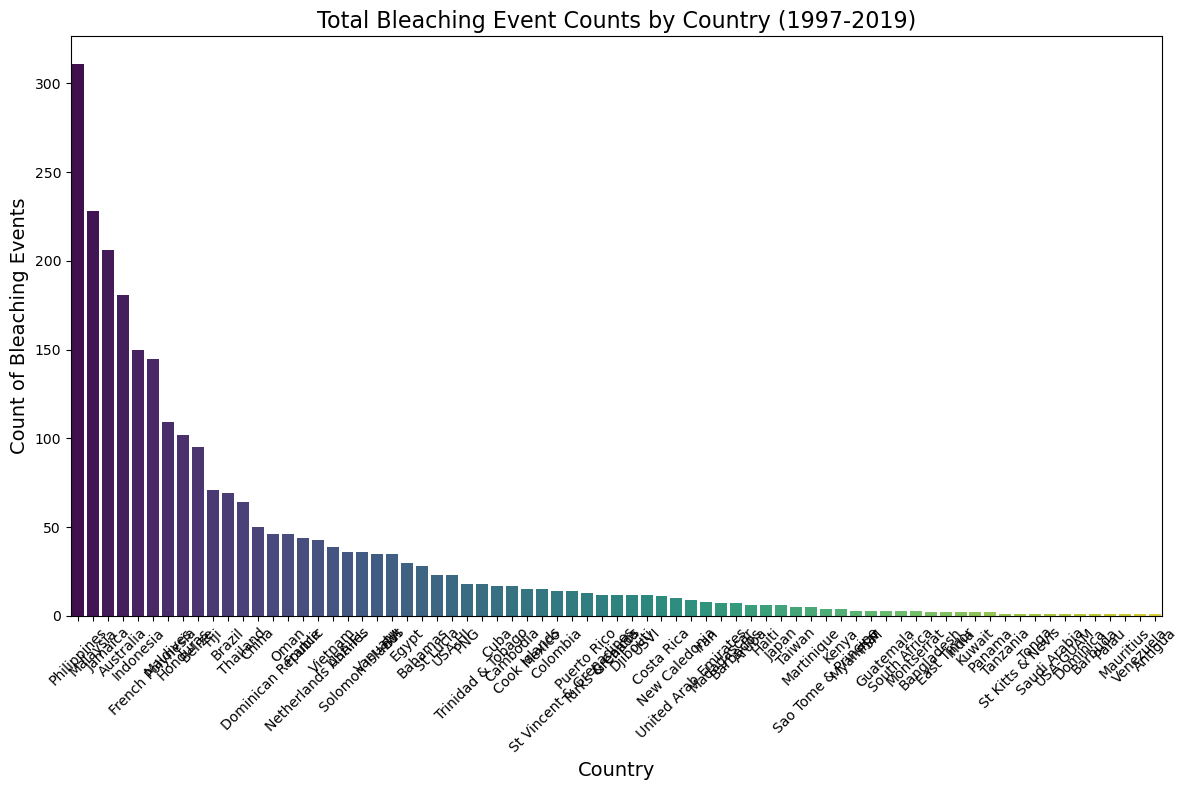

In [17]:
# 1. All bleaching event counts of countries

all_counts=USEPA_df.groupby("Country").size().reset_index(name="Bleaching_event_count")
all_counts=all_counts.sort_values(by="Bleaching_event_count", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=all_counts, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Total Bleaching Event Counts by Country (1997-2019)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

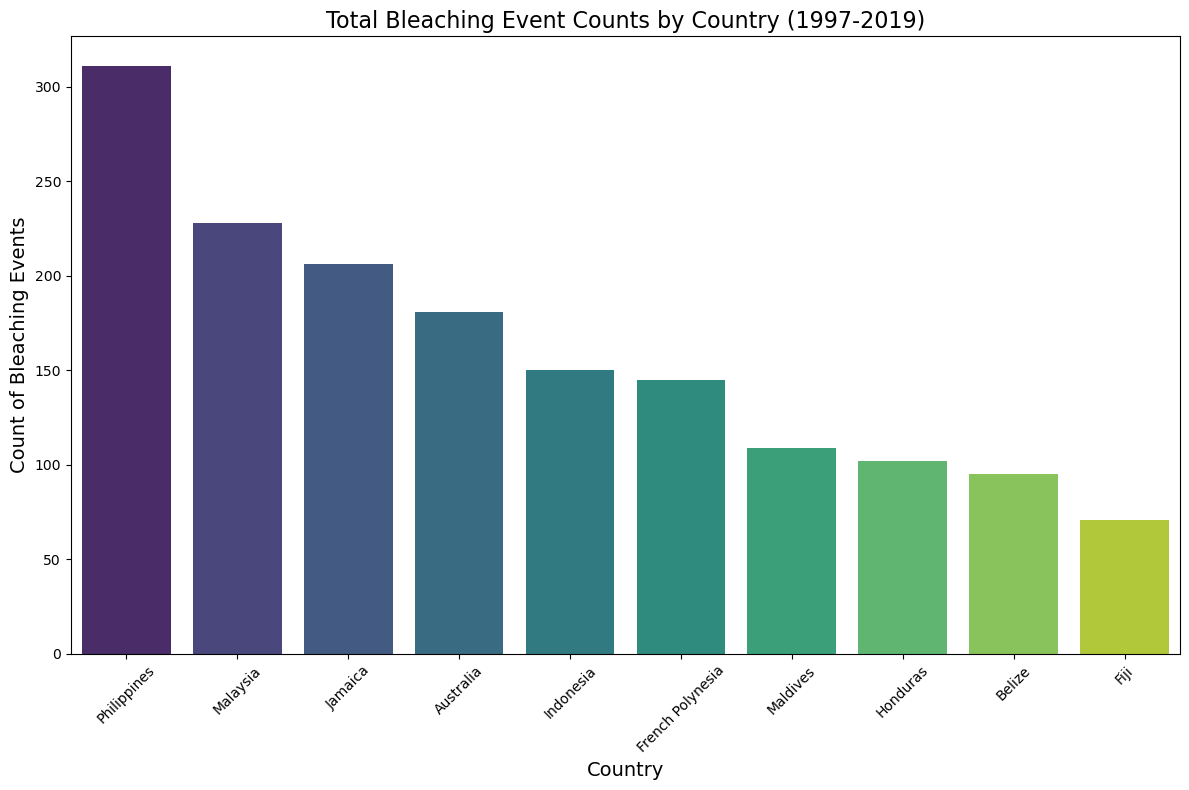

In [18]:
# See the top 10
all_counts=all_counts.sort_values(by="Bleaching_event_count", ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=all_counts, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Total Bleaching Event Counts by Country (1997-2019)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

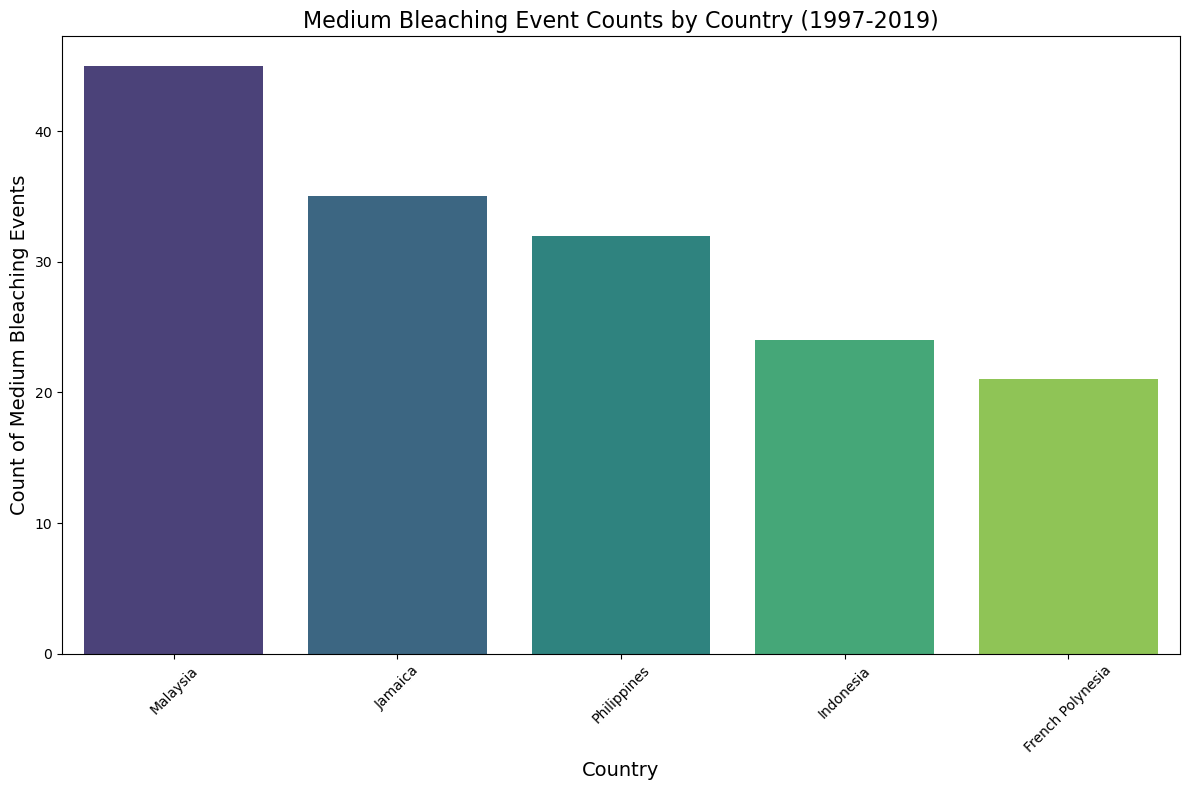

In [19]:
# Top 5 countries for medium bleaching events

medium_counts=USEPA_df[USEPA_df["Bleaching_category"]=="Medium"].groupby("Country").size().reset_index(name="Bleaching_event_count")
medium_counts=medium_counts.sort_values(by="Bleaching_event_count", ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(data=medium_counts, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Medium Bleaching Event Counts by Country (1997-2019)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Medium Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


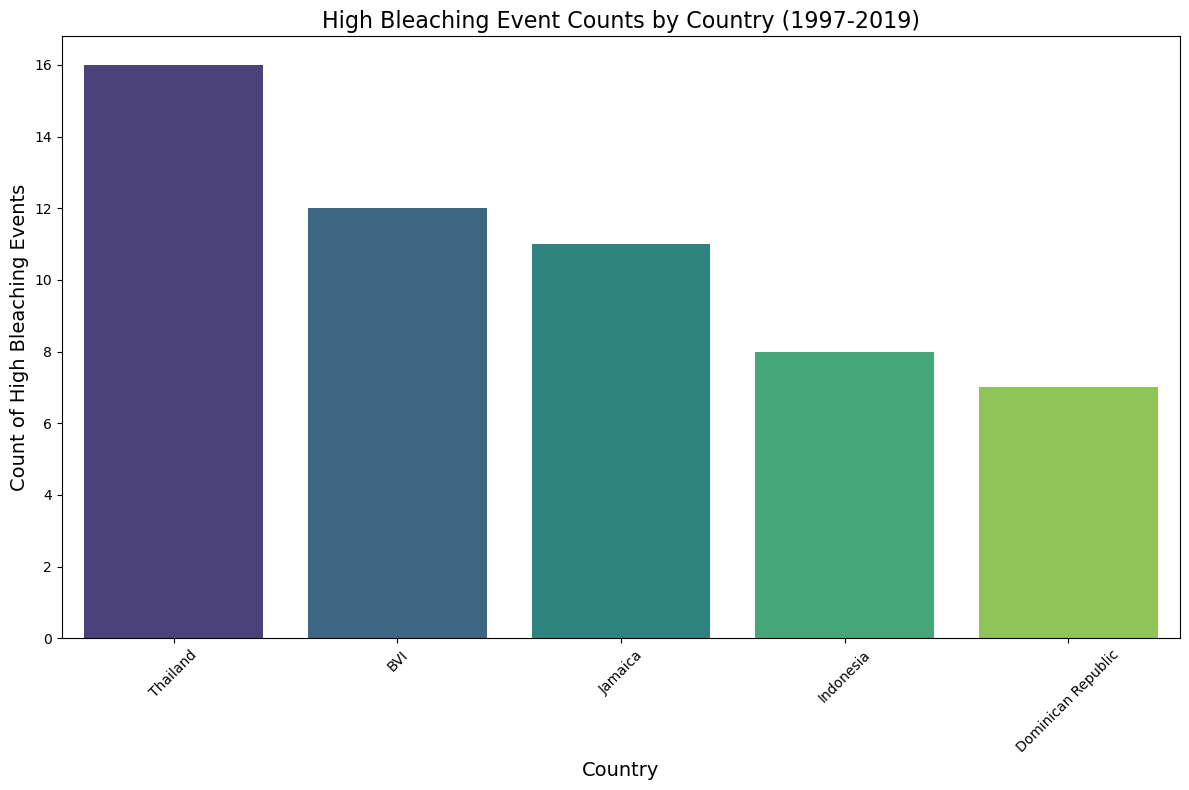

In [20]:
# Top 5 countries for high bleaching event counts
high_counts=USEPA_df[USEPA_df["Bleaching_category"]=="High"].groupby("Country").size().reset_index(name="Bleaching_event_count")
high_counts=high_counts.sort_values(by="Bleaching_event_count", ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(data=high_counts, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("High Bleaching Event Counts by Country (1997-2019)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of High Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Robert van Woesik's Global Bleaching Data

In [21]:
RVW_df.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd


In [22]:
RVW_df.shape

(41361, 62)

In [23]:
RVW_df.isnull().sum()

Site_ID               0
Sample_ID             0
Data_Source           0
Latitude_Degrees      0
Longitude_Degrees     0
                     ..
TSA_DHWMean           0
Date                  0
Site_Comments         0
Sample_Comments       0
Bleaching_Comments    0
Length: 62, dtype: int64

In [24]:
# We want to keep the country name and bleaching_level
# But first, we need to remove bleaching_levels that equal to 0 
# And then classify it into low, medium, and high

RVW_df=RVW_df[(RVW_df["Country_Name"] != "nd")]
RVW_df["Percent_Bleaching"]=pd.to_numeric(RVW_df["Percent_Bleaching"], errors="coerce")
RVW_df=RVW_df[RVW_df["Percent_Bleaching"]>0]
RVW_df["Bleaching_Category"]=RVW_df["Percent_Bleaching"].apply(classify_bleaching)
RVW_df=RVW_df[["Country_Name", "Bleaching_Category"]]
RVW_df.head()

,Country_Name,Bleaching_Category
0,Cuba,High
1,French Polynesia,High
2,United Kingdom,High
3,United States,High
4,United States,High


For the last time, visualize 3 things:

1) All bleaching event counts of countries
2) Medium bleaching event counts of countries
3) High bleaching event counts of countries

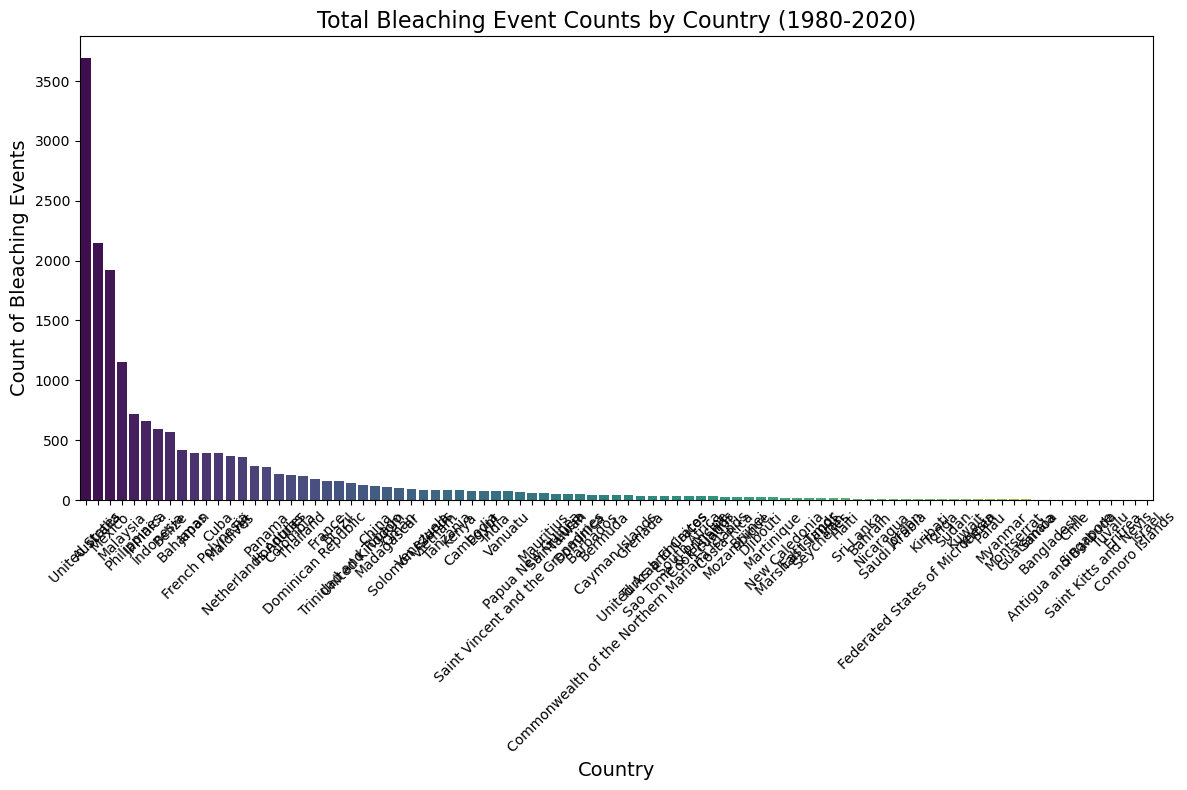

In [25]:
all_counts=RVW_df.groupby("Country_Name").size().reset_index(name="Bleaching_event_count")
all_counts=all_counts.sort_values(by="Bleaching_event_count",ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=all_counts,x="Country_Name",y="Bleaching_event_count",palette="viridis")
plt.title("Total Bleaching Event Counts by Country (1980-2020)",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Count of Bleaching Events",fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

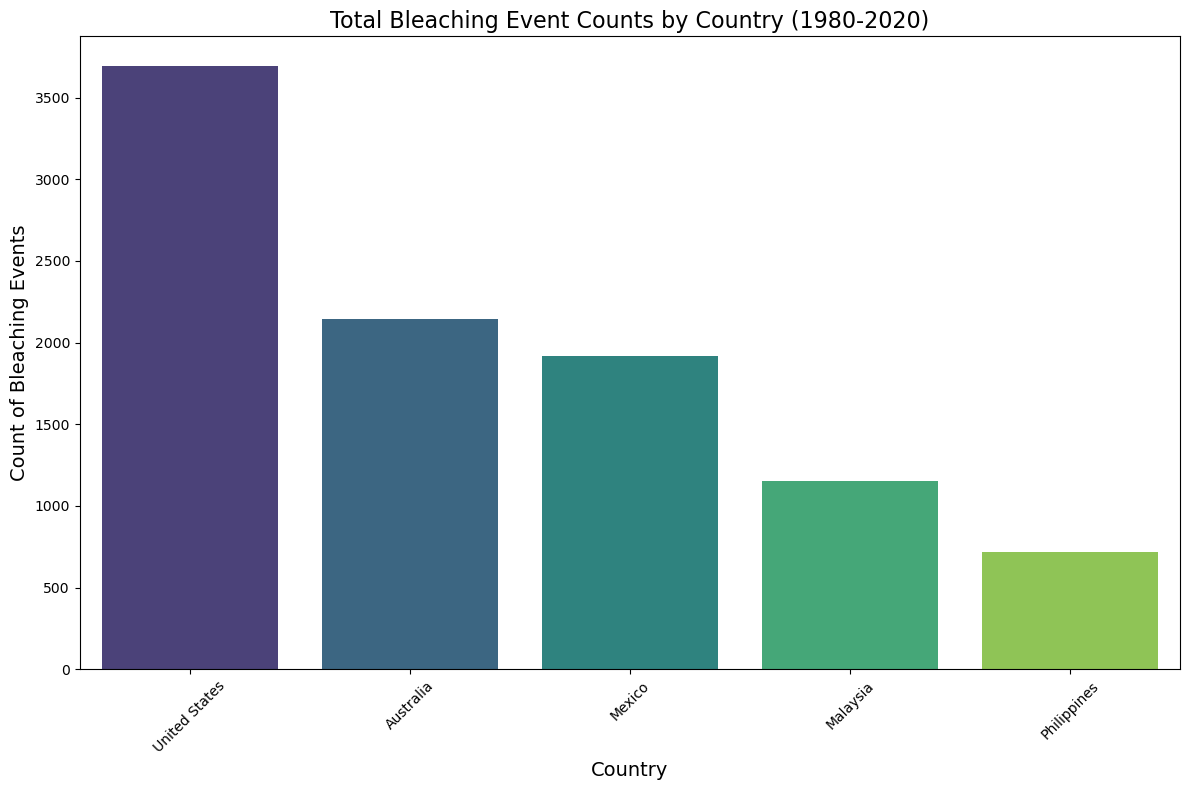

In [26]:
all_counts=RVW_df.groupby("Country_Name").size().reset_index(name="Bleaching_event_count")
all_counts=all_counts.sort_values(by="Bleaching_event_count",ascending=False).head(5)

plt.figure(figsize=(12,8))
sns.barplot(data=all_counts,x="Country_Name",y="Bleaching_event_count",palette="viridis")
plt.title("Total Bleaching Event Counts by Country (1980-2020)",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Count of Bleaching Events",fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

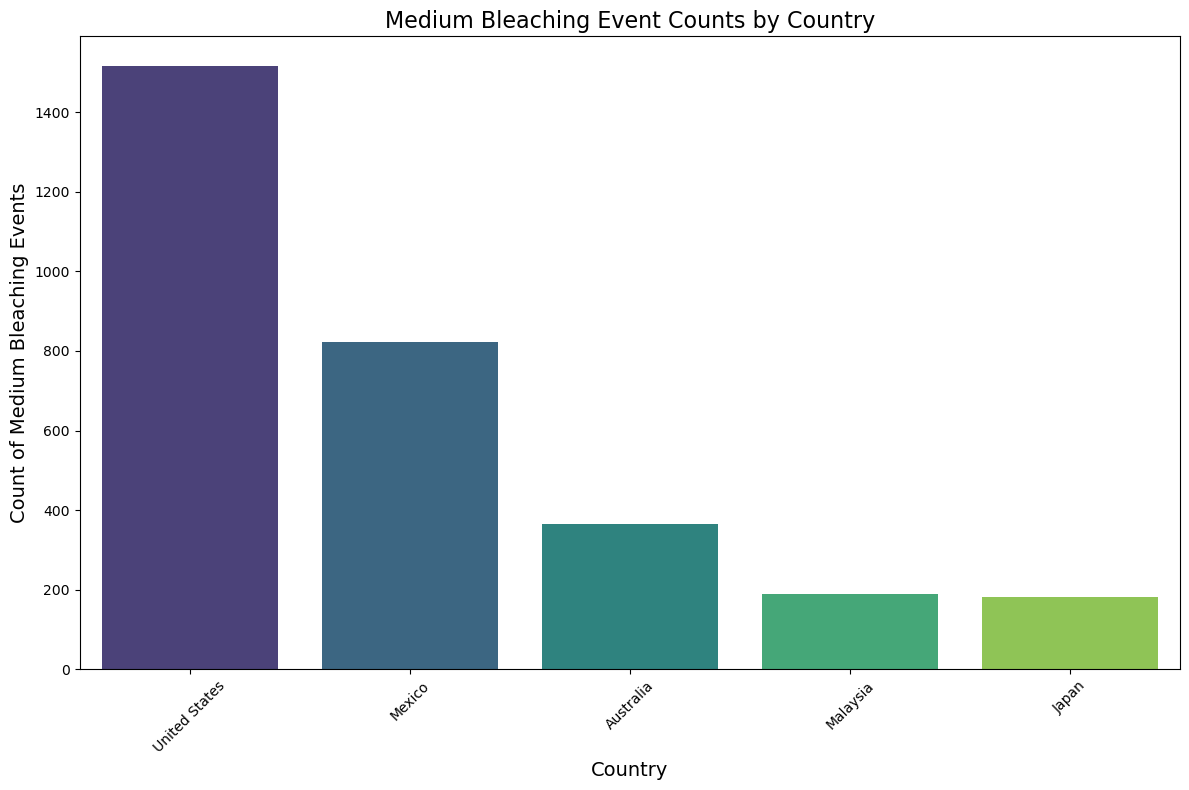

In [27]:
medium_counts=RVW_df[RVW_df["Bleaching_Category"]=="Medium"].groupby("Country_Name").size().reset_index(name="Bleaching_event_count")
medium_counts=medium_counts.sort_values(by="Bleaching_event_count",ascending=False).head(5)

plt.figure(figsize=(12,8))
sns.barplot(data=medium_counts,x="Country_Name",y="Bleaching_event_count",palette="viridis")
plt.title("Medium Bleaching Event Counts by Country",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Count of Medium Bleaching Events",fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


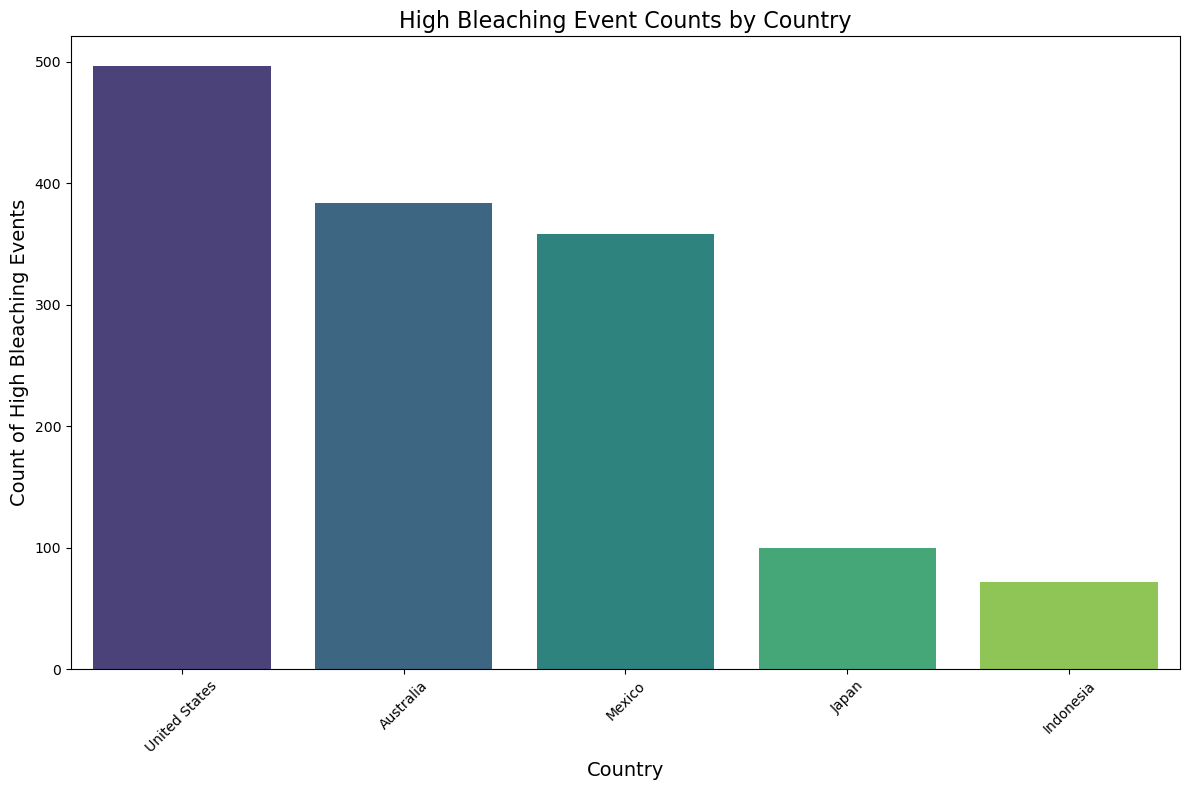

In [28]:
high_counts=RVW_df[RVW_df["Bleaching_Category"]=="High"].groupby("Country_Name").size().reset_index(name="Bleaching_event_count")
high_counts=high_counts.sort_values(by="Bleaching_event_count",ascending=False).head(5)

plt.figure(figsize=(12,8))
sns.barplot(data=high_counts,x="Country_Name",y="Bleaching_event_count",palette="viridis")
plt.title("High Bleaching Event Counts by Country",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Count of High Bleaching Events",fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
counts=RVW_df.groupby(["Country_Name", "Bleaching_Category"]).size().reset_index(name="Count")
print(counts)

            Country_Name Bleaching_Category  Count
0    Antigua and Barbuda                Low      2
1    Antigua and Barbuda             Medium      2
2              Australia               High    384
3              Australia                Low   1398
4              Australia             Medium    364
..                   ...                ...    ...
213            Venezuela                Low     78
214            Venezuela             Medium      7
215              Vietnam               High      4
216              Vietnam                Low     82
217                Yemen                Low      6

[218 rows x 3 columns]


In [30]:
us_counts=counts[counts["Country_Name"]=="United States"]
print(us_counts)

      Country_Name Bleaching_Category  Count
206  United States               High    496
207  United States                Low   1679
208  United States             Medium   1515


## Combining the data to make one graph!

In [31]:
# Redoing the process so it makes it easier to keep track of what I already did
RB_df=pd.read_csv("Reefbase_bleaching_data.csv")
USEPA_df=pd.read_csv("USEnvProt_coralreef.csv")
RVW_df=pd.read_csv("RVW_global_bleaching.csv")

# Preprocessing
RB_df=RB_df[(RB_df["BLEACHING_SEVERITY"] != "Severity Unknown") & 
               (RB_df["BLEACHING_SEVERITY"] != "No Bleaching")]
RB_df=RB_df[["COUNTRY", "BLEACHING_SEVERITY"]]
RB_df.rename(columns={"BLEACHING_SEVERITY": "Bleaching_Category", "COUNTRY": "Country"}, inplace=True)  
RB_df.shape

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_38335/688646805.py:4: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  RVW_df=pd.read_csv("RVW_global_bleaching.csv")


(3512, 2)

In [32]:
USEPA_df=USEPA_df[USEPA_df["Errors."]==False]
USEPA_df=USEPA_df[USEPA_df["Average_bleaching"]>0]
USEPA_df["Bleaching_Category"]=USEPA_df["Average_bleaching"].apply(classify_bleaching)
USEPA_df=USEPA_df[["Country", "Bleaching_Category"]] 
USEPA_df.shape

(2558, 2)

In [33]:
RVW_df=RVW_df[RVW_df["Country_Name"]!="nd"]
RVW_df["Percent_Bleaching"]=pd.to_numeric(RVW_df["Percent_Bleaching"], errors="coerce")
RVW_df=RVW_df[RVW_df["Percent_Bleaching"]>0]
RVW_df["Bleaching_Category"]=RVW_df["Percent_Bleaching"].apply(classify_bleaching)
RVW_df=RVW_df[["Country_Name", "Bleaching_Category"]]
RVW_df.rename(columns={"Country_Name": "Country"}, inplace=True)
RVW_df.shape

(17886, 2)

In [34]:
combined_df=pd.concat([RB_df, USEPA_df, RVW_df], ignore_index=True)
combined_df["Bleaching_Category"]=combined_df["Bleaching_Category"].replace("HIGH", "High")
combined_df.head()

,Country,Bleaching_Category
0,Mexico (Pacific),High
1,Panama (Atlantic),Medium
2,St. Croix,Medium
3,St. Croix,Low
4,St. Croix,Low


In [35]:
combined_df.shape

(23956, 2)

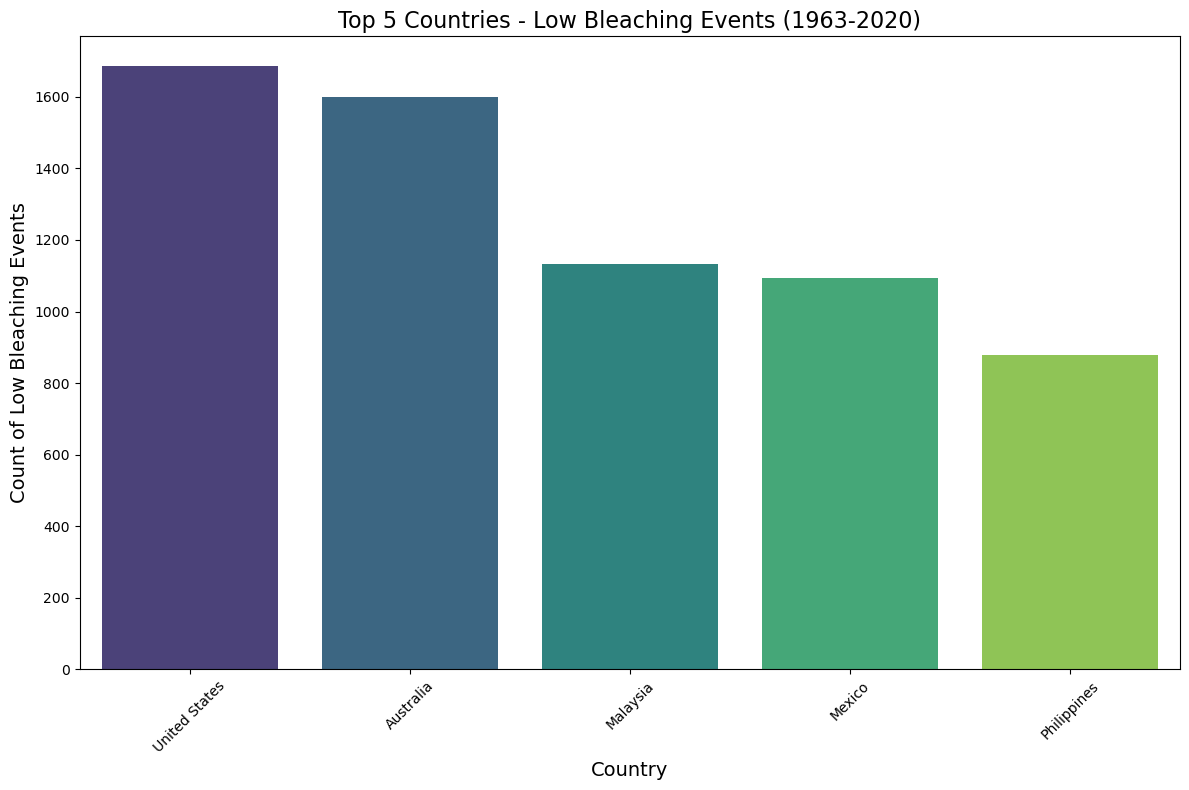

In [36]:
low_counts=combined_df[combined_df["Bleaching_Category"]=="Low"].groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_low=low_counts.nlargest(5, "Bleaching_event_count")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_low, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Top 5 Countries - Low Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Low Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

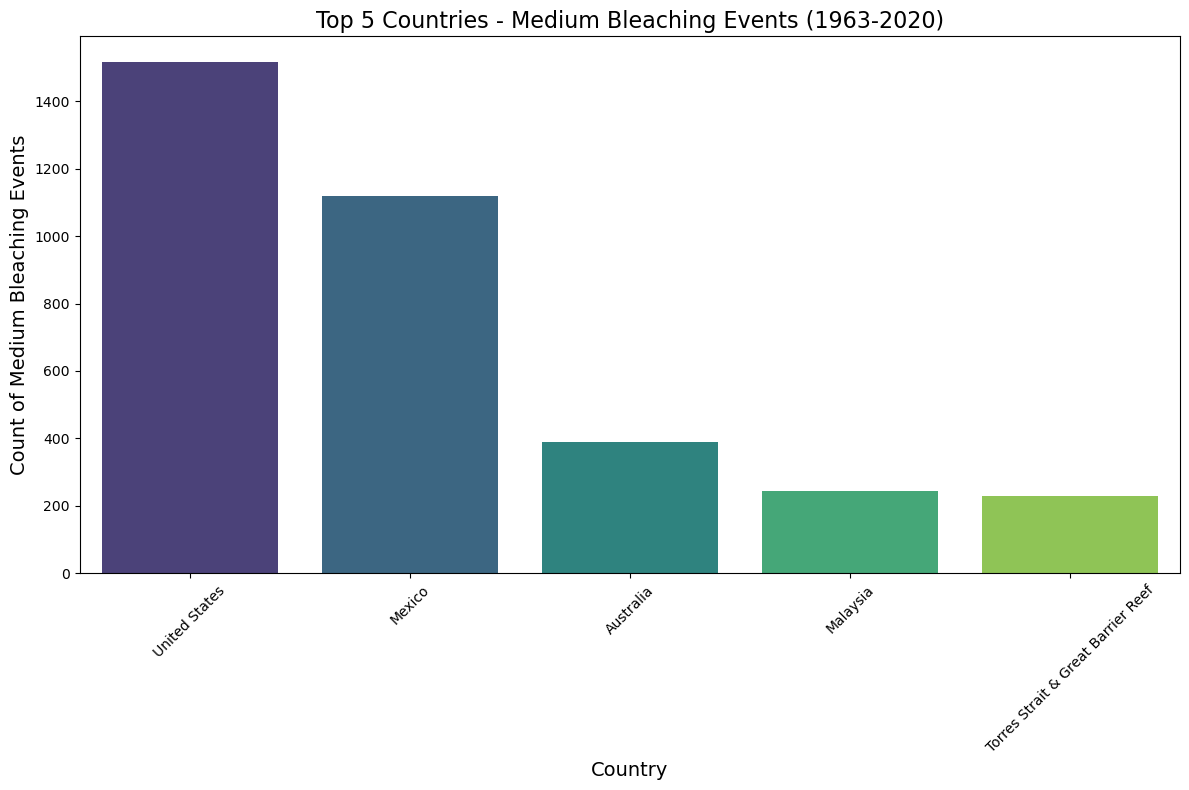

In [37]:
medium_counts=combined_df[combined_df["Bleaching_Category"]=="Medium"].groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_medium=medium_counts.nlargest(5, "Bleaching_event_count")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_medium, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Top 5 Countries - Medium Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of Medium Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


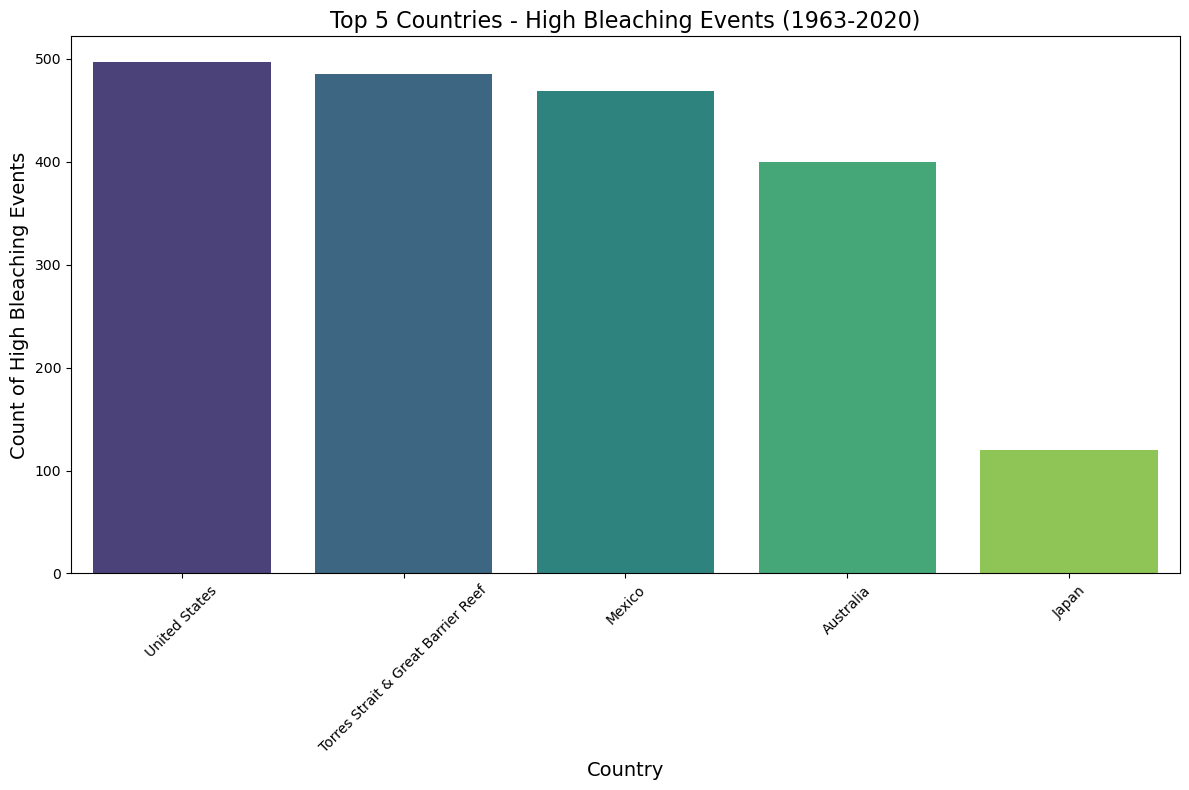

In [38]:
high_counts=combined_df[combined_df["Bleaching_Category"]=="High"].groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_high=high_counts.nlargest(5, "Bleaching_event_count")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_high, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Top 5 Countries - High Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of High Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

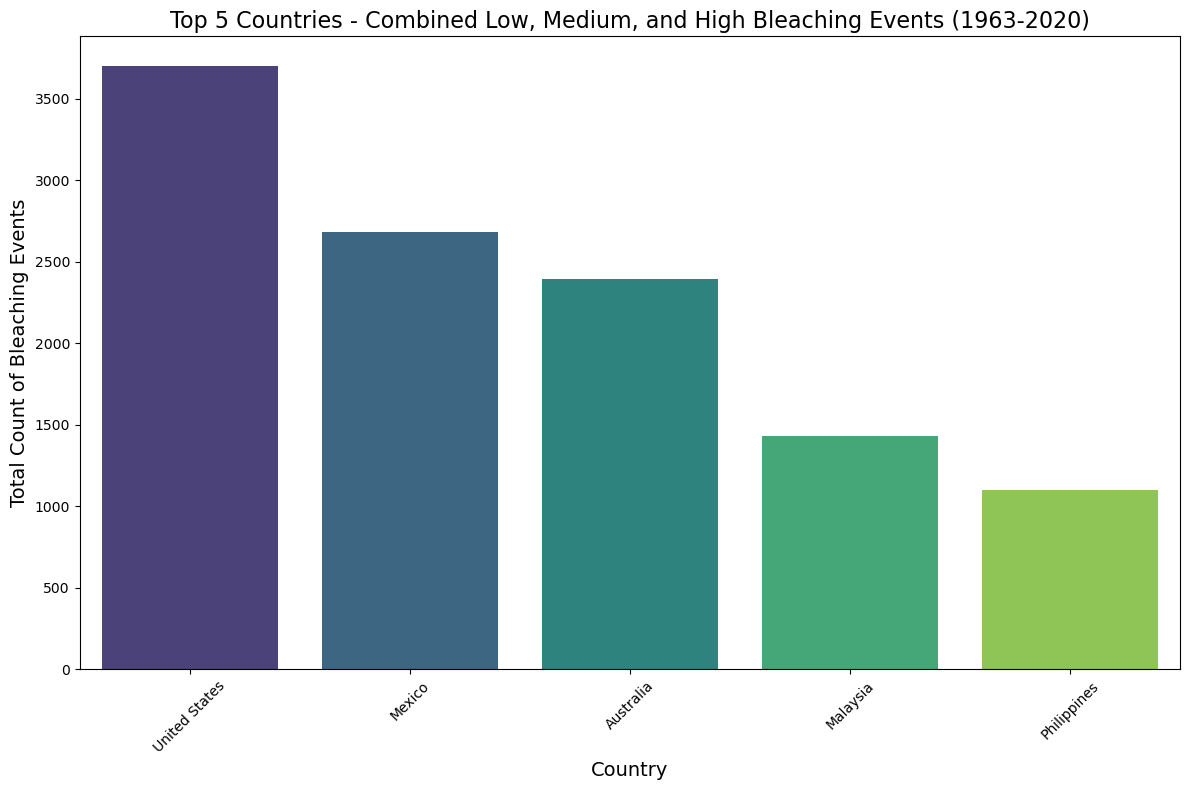

In [39]:
combined_counts=combined_df.groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_combined=combined_counts.nlargest(5, "Bleaching_event_count")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_combined, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Top 5 Countries - Combined Low, Medium, and High Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Count of Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Adding more details to the combined dataframe (lat, lon, location)

In [40]:
RB_df=pd.read_csv("Reefbase_bleaching_data.csv")
USEPA_df=pd.read_csv("USEnvProt_coralreef.csv")
RVW_df=pd.read_csv("RVW_global_bleaching.csv")

RB_df=RB_df[(RB_df["BLEACHING_SEVERITY"] != "Severity Unknown") & (RB_df["BLEACHING_SEVERITY"] != "No Bleaching")]
RB_df=RB_df[["COUNTRY", "BLEACHING_SEVERITY", "LAT", "LON"]]
RB_df.rename(columns={"BLEACHING_SEVERITY": "Bleaching_Category", "LAT": "Latitude", "LON": "Longitude"}, inplace=True)

USEPA_df=USEPA_df[USEPA_df["Errors."]==False]
USEPA_df=USEPA_df[USEPA_df["Average_bleaching"]>0]
USEPA_df["Bleaching_category"]=USEPA_df["Average_bleaching"].apply(classify_bleaching)
USEPA_df["Location"]=USEPA_df["Reef.Name"]+ ", "+USEPA_df["State.Province.Island"]
USEPA_df=USEPA_df[["Country", "Bleaching_category", "Latitude.Degrees", "Longitude.Degrees", "Location"]]
USEPA_df.rename(columns={"Bleaching_category": "Bleaching_Category", "Latitude.Degrees": "Latitude", "Longitude.Degrees": "Longitude"}, inplace=True)

RVW_df=RVW_df[RVW_df["Country_Name"]!="nd"]
RVW_df["Percent_Bleaching"]=pd.to_numeric(RVW_df["Percent_Bleaching"], errors="coerce")
RVW_df=RVW_df[RVW_df["Percent_Bleaching"]>0]
RVW_df["Bleaching_Category"]=RVW_df["Percent_Bleaching"].apply(classify_bleaching)
RVW_df["Location"]=RVW_df["Site_Name"]+ ", " +RVW_df["State_Island_Province_Name"]
RVW_df=RVW_df[["Country_Name", "Bleaching_Category", "Latitude_Degrees", "Longitude_Degrees", "Location"]]
RVW_df.rename(columns={"Country_Name": "Country", "Latitude_Degrees": "Latitude", "Longitude_Degrees": "Longitude"}, inplace=True)

combined_df=pd.concat([RB_df, USEPA_df, RVW_df], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.head()

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_38335/3796587076.py:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  RVW_df=pd.read_csv("RVW_global_bleaching.csv")


,COUNTRY,Bleaching_Category,Latitude,Longitude,Country,Location
0,Mexico (Pacific),HIGH,16.0000,-95.0000,NaN,NaN
1,Panama (Atlantic),Medium,9.2723,-82.0065,NaN,NaN
2,St. Croix,Medium,17.7900,-64.6300,NaN,NaN
3,St. Croix,Low,17.6840,-64.7390,NaN,NaN
4,St. Croix,Low,17.7000,-64.9000,NaN,NaN


In [43]:
combined_df.shape

(23956, 6)

In [41]:
bleach_location=combined_df[["Bleaching_Category", "Latitude", "Longitude"]]

m=folium.Map(location=[bleach_location["Latitude"].mean(), bleach_location["Longitude"].mean()], zoom_start=2)
heat_data=[[point[0], point[1], 1] for point in zip(bleach_location["Latitude"], bleach_location["Longitude"])]
HeatMap(heat_data).add_to(m)
m.save("Bleach_Map_Locations.html")


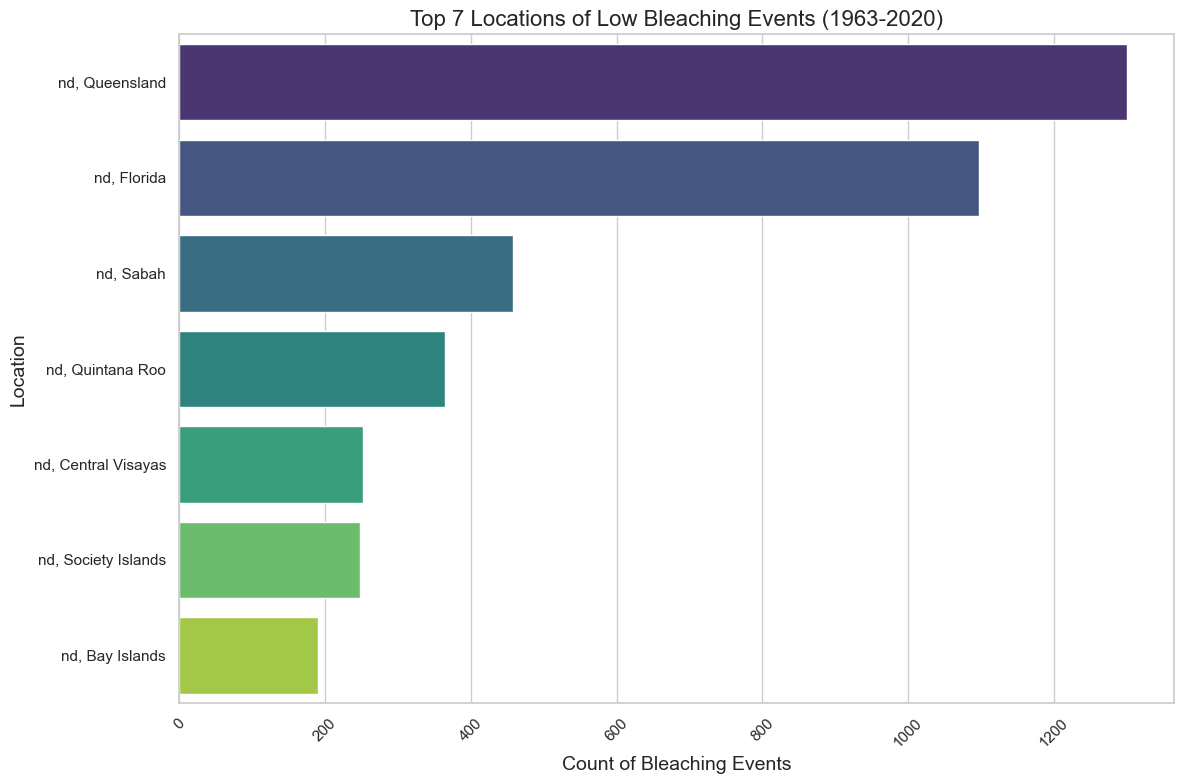

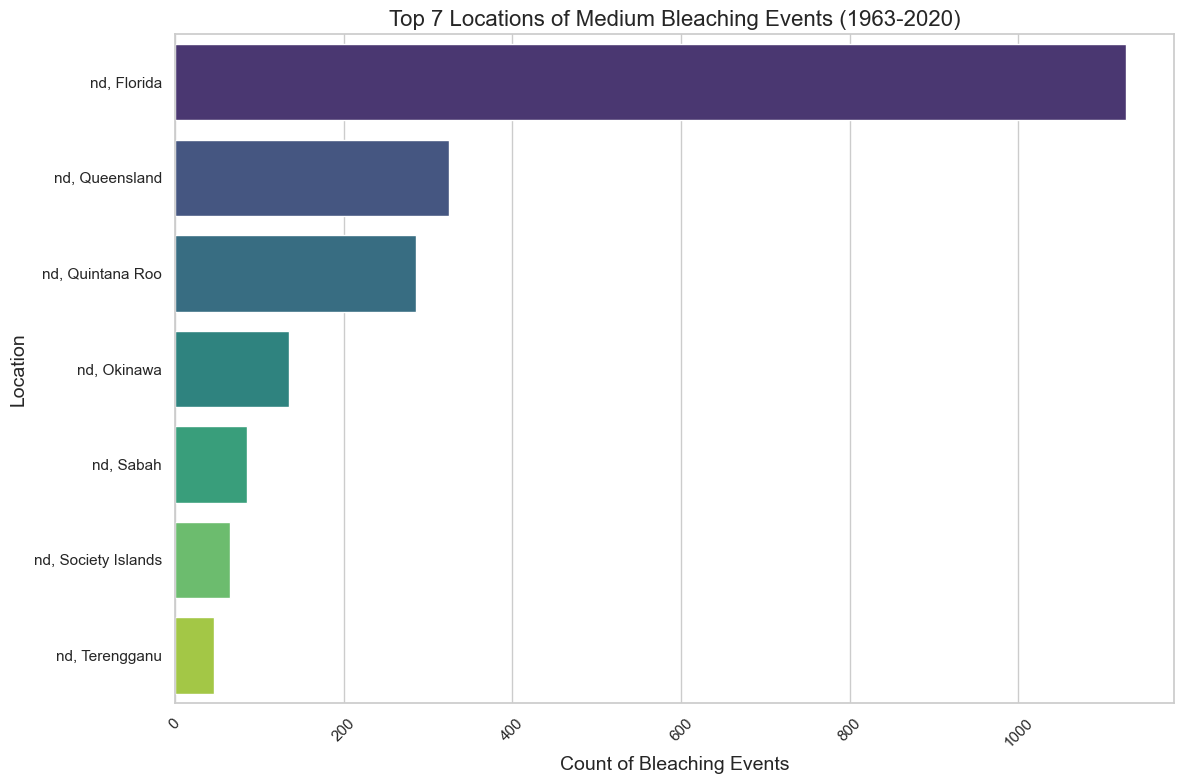

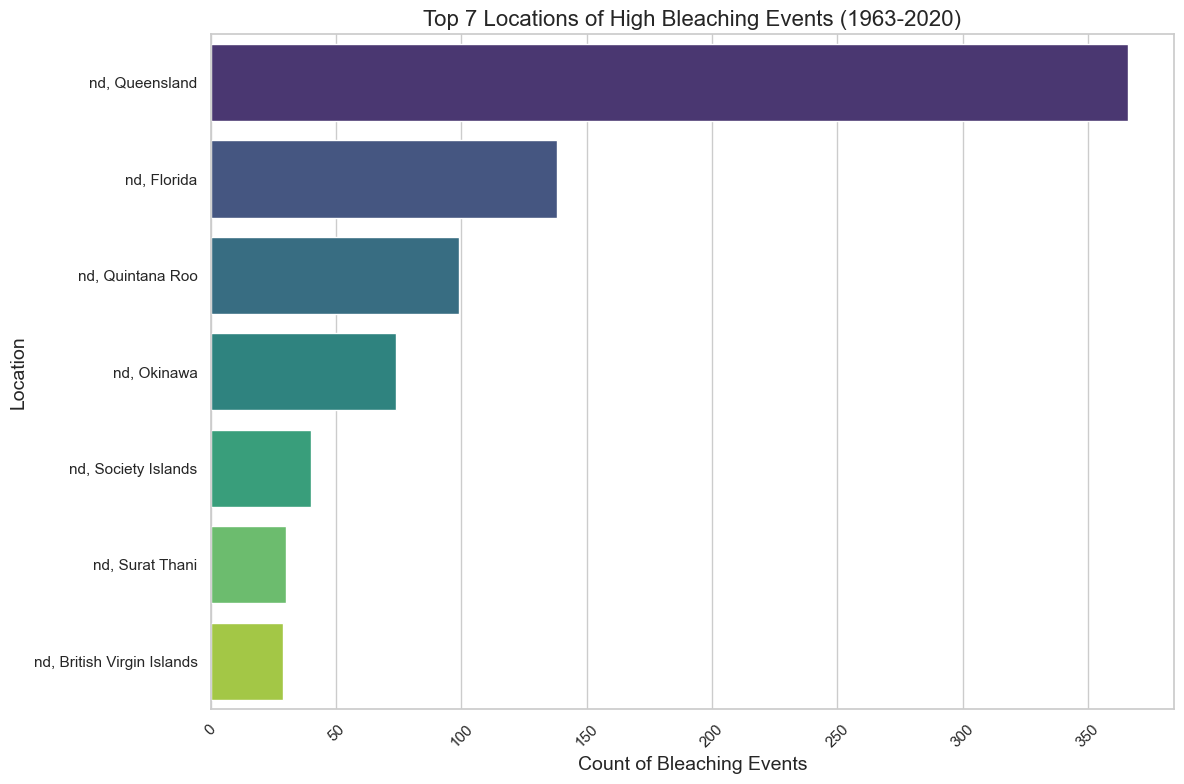

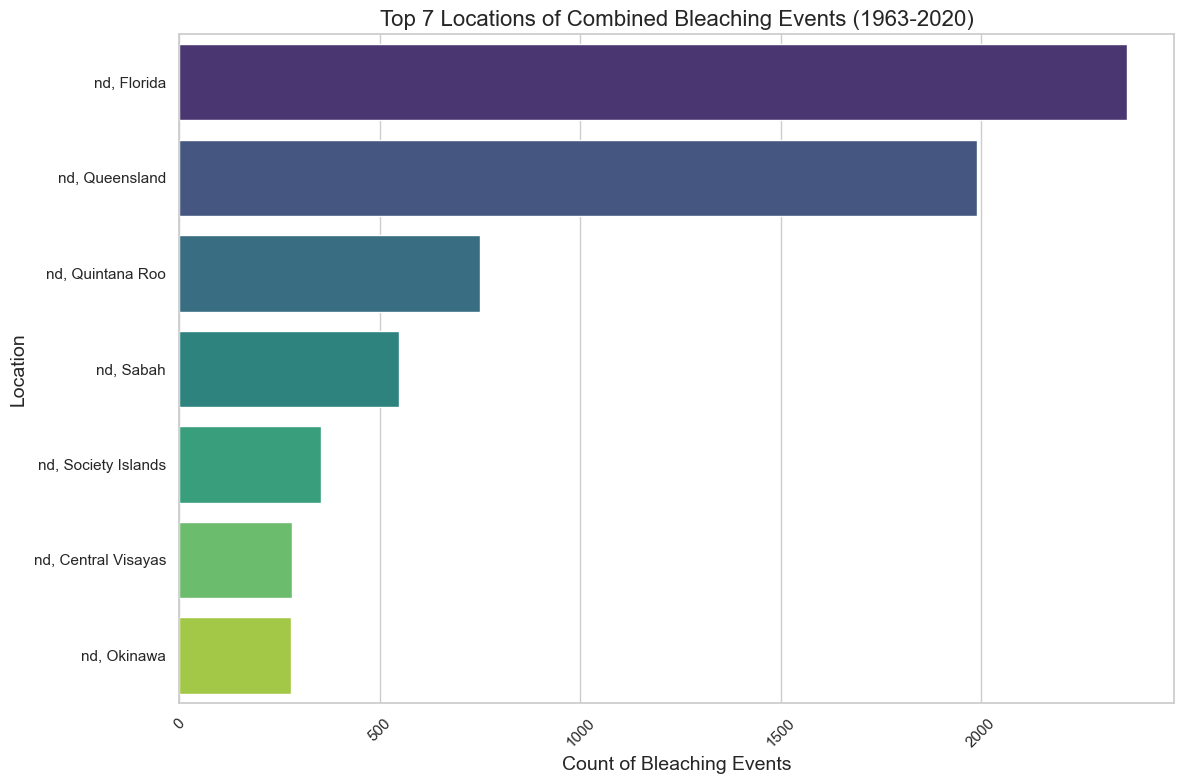

In [42]:
sns.set(style="whitegrid")
def plot_top_locations(data, category, title, top_n=7):
    top_locations=data[data["Bleaching_Category"]==category].groupby("Location").size().reset_index(name="Count")
    top_locations=top_locations.nlargest(top_n, "Count")

    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_locations, x="Count", y="Location", palette="viridis")
    plt.title(f"Top {top_n} Locations of {title} Bleaching Events (1963-2020)", fontsize=16)
    plt.xlabel("Count of Bleaching Events", fontsize=14)
    plt.ylabel("Location", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_locations(combined_df, "Low", "Low")
plot_top_locations(combined_df, "Medium", "Medium")
plot_top_locations(combined_df, "High", "High")
combined_top_locations=combined_df.groupby("Location").size().reset_index(name="Count").nlargest(7, "Count")

plt.figure(figsize=(12, 8))
sns.barplot(data=combined_top_locations, x="Count", y="Location", palette="viridis")
plt.title(f"Top 7 Locations of Combined Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Count of Bleaching Events", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## The graphs I'd like to post

In [86]:
RB_df=pd.read_csv("Reefbase_bleaching_data.csv")
USEPA_df=pd.read_csv("USEnvProt_coralreef.csv")
RVW_df=pd.read_csv("RVW_global_bleaching.csv")

RB_df=RB_df[(RB_df["BLEACHING_SEVERITY"] != "Severity Unknown") & (RB_df["BLEACHING_SEVERITY"] != "No Bleaching")]
RB_df=RB_df[["COUNTRY", "BLEACHING_SEVERITY", "LAT", "LON"]]
RB_df.rename(columns={"BLEACHING_SEVERITY": "Bleaching_Category", "LAT": "Latitude", "LON": "Longitude"}, inplace=True)

USEPA_df=USEPA_df[USEPA_df["Errors."]==False]
USEPA_df=USEPA_df[USEPA_df["Average_bleaching"]>0]
USEPA_df["Bleaching_category"]=USEPA_df["Average_bleaching"].apply(classify_bleaching)
USEPA_df["Location"]=USEPA_df["Reef.Name"]+ ", "+USEPA_df["State.Province.Island"]
USEPA_df=USEPA_df[["Country", "Bleaching_category", "Latitude.Degrees", "Longitude.Degrees", "Location"]]
USEPA_df.rename(columns={"Bleaching_category": "Bleaching_Category", "Latitude.Degrees": "Latitude", "Longitude.Degrees": "Longitude"}, inplace=True)

RVW_df=RVW_df[RVW_df["Country_Name"]!="nd"]
RVW_df["Percent_Bleaching"]=pd.to_numeric(RVW_df["Percent_Bleaching"], errors="coerce")
RVW_df=RVW_df[RVW_df["Percent_Bleaching"]>0]
RVW_df["Bleaching_Category"]=RVW_df["Percent_Bleaching"].apply(classify_bleaching)
RVW_df["Location"]=RVW_df["Site_Name"]+ ", " +RVW_df["State_Island_Province_Name"]
RVW_df=RVW_df[["Country_Name", "Bleaching_Category", "Latitude_Degrees", "Longitude_Degrees", "Location"]]
RVW_df.rename(columns={"Country_Name": "Country", "Latitude_Degrees": "Latitude", "Longitude_Degrees": "Longitude"}, inplace=True)

combined_df=pd.concat([RB_df, USEPA_df, RVW_df], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.head()

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_38335/3796587076.py:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  RVW_df=pd.read_csv("RVW_global_bleaching.csv")


,COUNTRY,Bleaching_Category,Latitude,Longitude,Country,Location
0,Mexico (Pacific),HIGH,16.0000,-95.0000,NaN,NaN
1,Panama (Atlantic),Medium,9.2723,-82.0065,NaN,NaN
2,St. Croix,Medium,17.7900,-64.6300,NaN,NaN
3,St. Croix,Low,17.6840,-64.7390,NaN,NaN
4,St. Croix,Low,17.7000,-64.9000,NaN,NaN


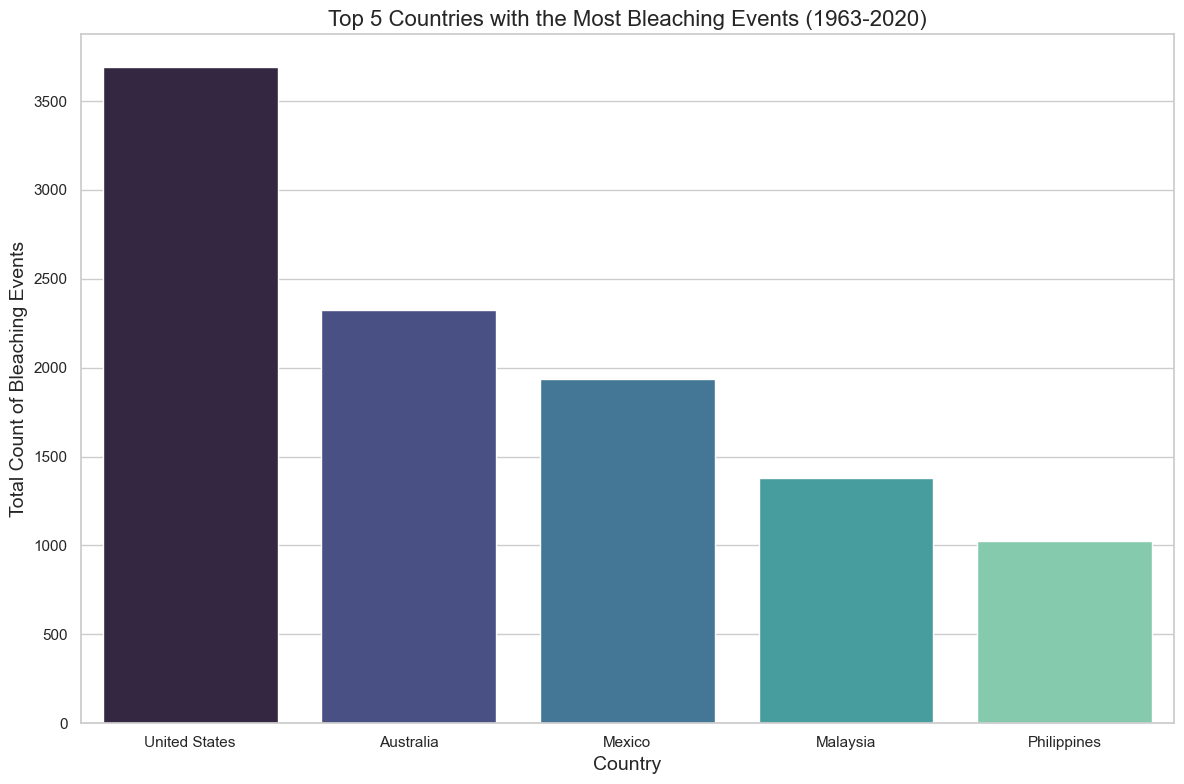

In [88]:
combined_counts=combined_df.groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_combined=(combined_counts.nlargest(5, "Bleaching_event_count"))

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_combined, x="Country", y="Bleaching_event_count", palette="mako")
plt.title("Top 5 Countries with the Most Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Count of Bleaching Events", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

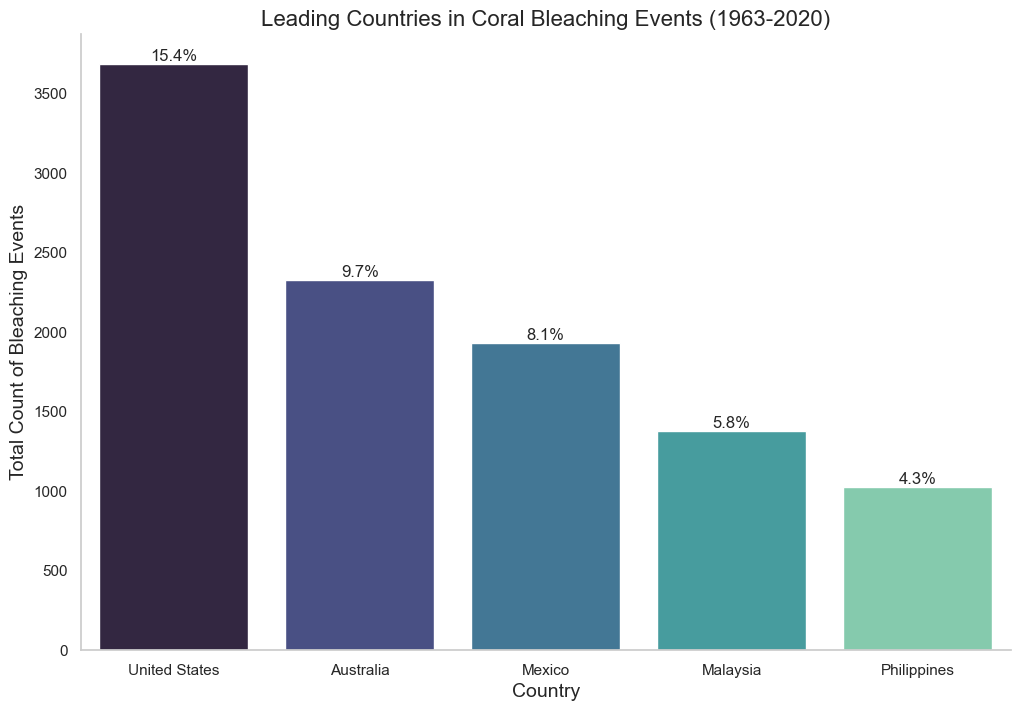

In [93]:
combined_counts=combined_df.groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_combined=combined_counts.nlargest(5,"Bleaching_event_count")
total_bleaching_events=combined_df.shape[0]
top_5_combined["Percentage"]=(top_5_combined["Bleaching_event_count"]/total_bleaching_events)*100
plt.figure(figsize=(12,8))
bar_plot=sns.barplot(data=top_5_combined,x="Country",y="Bleaching_event_count",palette="mako")
plt.title("Leading Countries in Coral Bleaching Events (1963-2020)",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Total Count of Bleaching Events",fontsize=14)
plt.xticks(rotation=0)
plt.bar_label(bar_plot.containers[0], labels=[f'{x:.1f}%' for x in top_5_combined["Percentage"]], label_type='edge')
plt.grid(False)
bar_plot.spines["top"].set_visible(False)
bar_plot.spines["right"].set_visible(False) 
plt.savefig("leading_countries_bleaching_events.png", bbox_inches='tight')
# plt.tight_layout()
plt.show()

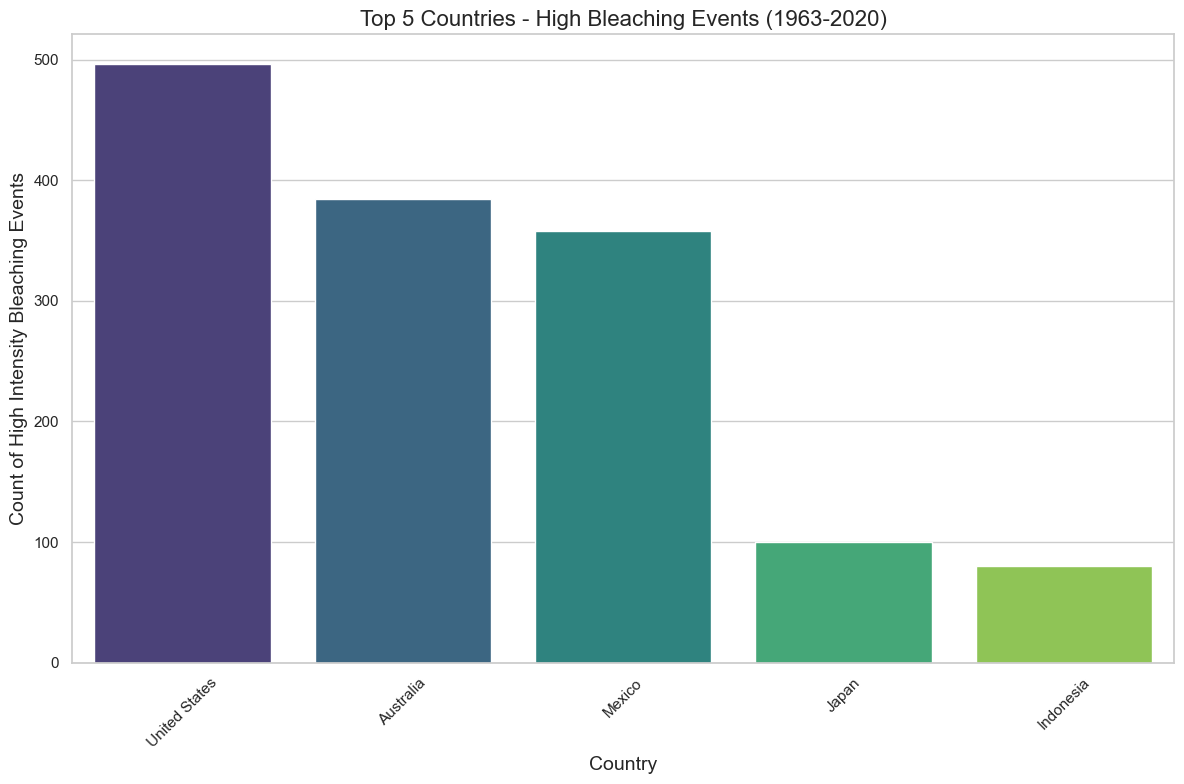

In [72]:
high_counts=combined_df[combined_df["Bleaching_Category"]=="High"].groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_high=high_counts.nlargest(5, "Bleaching_event_count")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_high, x="Country", y="Bleaching_event_count", palette="viridis")
plt.title("Top 5 Countries - High Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of High Intensity Bleaching Events", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

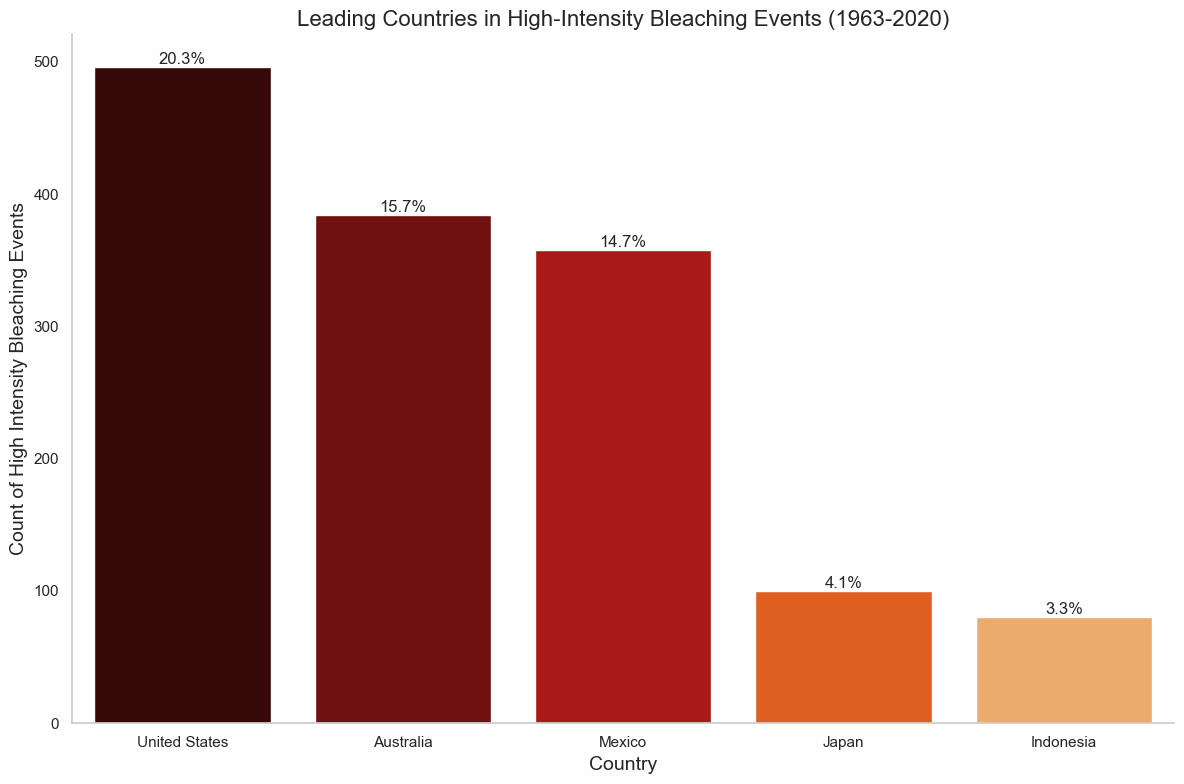

In [94]:
high_counts=combined_df[combined_df["Bleaching_Category"]=="High"].groupby("Country").size().reset_index(name="Bleaching_event_count")
top_5_high=high_counts.nlargest(5, "Bleaching_event_count")

total_high_bleaching_events=combined_df[combined_df["Bleaching_Category"]=="High"].shape[0]
top_5_high["Percentage"]=(top_5_high["Bleaching_event_count"]/total_high_bleaching_events)*100

plt.figure(figsize=(12, 8))
bar_plot=sns.barplot(data=top_5_high, x="Country", y="Bleaching_event_count", palette="gist_heat")
plt.title("Leading Countries in High-Intensity Bleaching Events (1963-2020)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count of High Intensity Bleaching Events", fontsize=14)
plt.xticks(rotation=0)
plt.bar_label(bar_plot.containers[0], labels=[f'{x:.1f}%' for x in top_5_high["Percentage"]], label_type='edge')
plt.grid(False)
bar_plot.spines["top"].set_visible(False)
bar_plot.spines["right"].set_visible(False) 
plt.savefig("leading_countries_high_bleaching_events.png", bbox_inches='tight')
plt.tight_layout()
plt.show()



In [44]:
# The heatmap
# bleach_location=combined_df[["Bleaching_Category", "Latitude", "Longitude"]]
# m=folium.Map(location=[bleach_location["Latitude"].mean(), bleach_location["Longitude"].mean()], zoom_start=2)
# heat_data=[[point[0], point[1], 1] for point in zip(bleach_location["Latitude"], bleach_location["Longitude"])]
# HeatMap(heat_data).add_to(m)
# m.save("Bleach_Map_Locations.html")

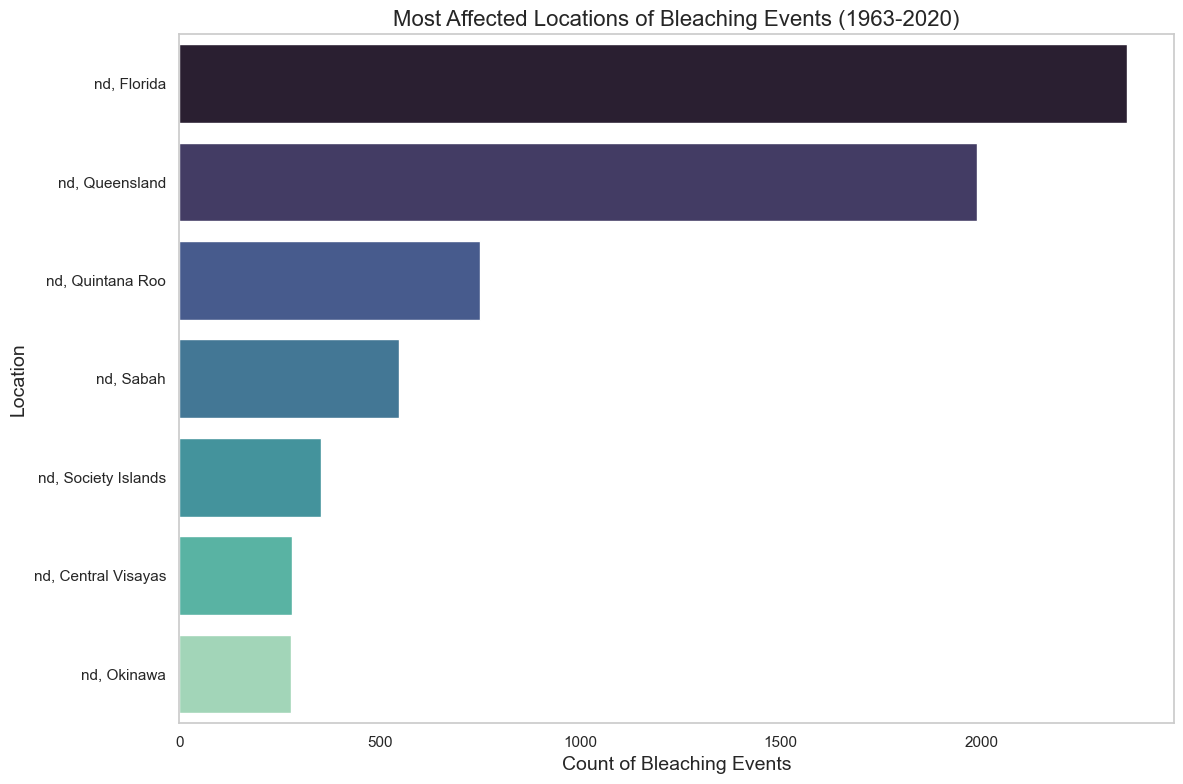

In [95]:
def plot_top_combined_locations(data, top_n=7):
    combined_top_locations=data.groupby("Location").size().reset_index(name="Count").nlargest(top_n, "Count")
    plt.figure(figsize=(12, 8))
    sns.barplot(data=combined_top_locations, x="Count", y="Location", palette="mako")
    plt.title("Most Affected Locations of Bleaching Events (1963-2020)", fontsize=16)
    plt.xlabel("Count of Bleaching Events", fontsize=14)
    plt.ylabel("Location", fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(False)
    # plt.savefig("top_combined_locations.png", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
plot_top_combined_locations(combined_df)

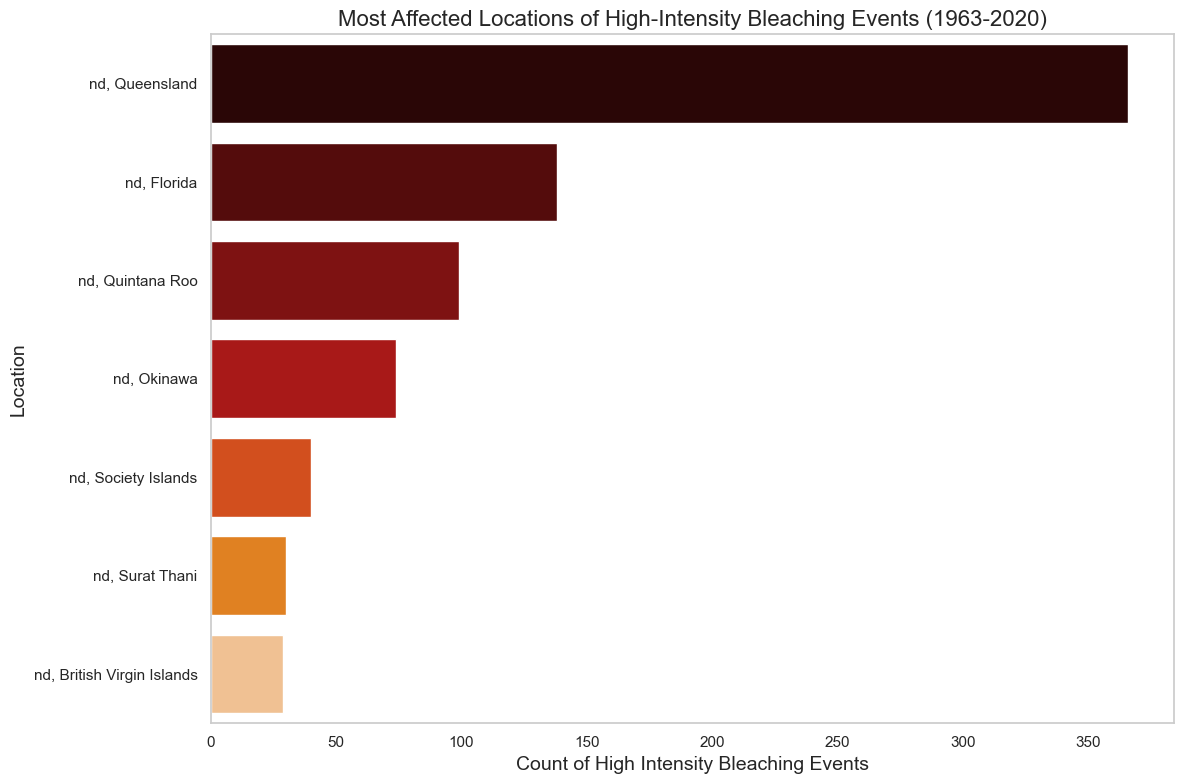

In [96]:
def plot_top_high_locations(data, category="High", title="High", top_n=7):
    top_high_locations=data[data["Bleaching_Category"]==category].groupby("Location").size().reset_index(name="Count")
    top_high_locations=top_high_locations.nlargest(top_n, "Count")
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_high_locations, x="Count", y="Location", palette="gist_heat")
    plt.title("Most Affected Locations of High-Intensity Bleaching Events (1963-2020)", fontsize=16)
    plt.xlabel("Count of High Intensity Bleaching Events", fontsize=14)
    plt.ylabel("Location", fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(False)
    # plt.savefig("most_affected_high_intensity_bleaching_locations.png", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
plot_top_high_locations(combined_df)